<a href="https://colab.research.google.com/github/charleanems/olist-store-analysis/blob/main/olist_store_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

In [1]:
# Installation required for Google Colab
!pip install scikit-learn-extra

In [2]:
# Installation required for Google Colab
%pip install mlxtend --upgrade

## Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot
import plotly.express as px
import warnings
import datetime
warnings.filterwarnings('ignore')
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.api import Holt
from pandas import DataFrame
from matplotlib import pyplot
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

## Reading data

Source: https://www.kaggle.com/olistbr/brazilian-ecommerce

In [4]:
customers = pd.read_csv('https://raw.githubusercontent.com/charleanems/olist-store-analysis/main/data/olist_customers_dataset.csv')
sellers = pd.read_csv('https://raw.githubusercontent.com/charleanems/olist-store-analysis/main/data/olist_sellers_dataset.csv')
products = pd.read_csv('https://raw.githubusercontent.com/charleanems/olist-store-analysis/main/data/olist_products_dataset.csv')
orders = pd.read_csv('https://raw.githubusercontent.com/charleanems/olist-store-analysis/main/data/olist_orders_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/charleanems/olist-store-analysis/main/data/olist_order_items_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/charleanems/olist-store-analysis/main/data/olist_order_reviews_dataset.csv')
order_payments = pd.read_csv('https://raw.githubusercontent.com/charleanems/olist-store-analysis/main/data/olist_order_payments_dataset.csv')
#geolocations = ('olist_geolocation_dataset.csv')

### Data Summary

Columns of different dataset:

#### Customers
* customer_id: id of the consumer.
* customer_unique_id: unique id of the consumer.
* customer_zip_code_prefix: zip code of the consumer.
* customer_city: customer city name.
* customer_state: customer state code (e.g: São Paulo-SP, Mato Grosso-MS).

#### Sellers
* seller_id: id of the seller.
* seller_zip_code_prefix: zip code of the seller.
* seller_city: seller city name.
* seller_state: seller state code (e.g: São Paulo-SP, Mato Grosso-MS).

#### Products
* product_id: id of the prodcut.
* product_category_name: name of the product category.
* product_name_lenght: length of the string.
* product_description_lenght:	length of the description.
* product_photos_qty: number of photos fot the product.
* product_weight_g: weight of the products ordered in grams.
* product_length_cm: length of the products ordered in centimeters.
* product_height_cm: height of the products ordered in centimeters.
* product_width_cm: width of the product ordered in centimeters.

#### Orders
* order_id: id of order.
* customer_id: customer_id: id of the consumer.
* order_status: status of the order made (e.g: shipped, delivered).
* order_purchase_timestamp: purchase date.
* order_approved_at: order approval date.
* order_delivered_carrier_date: delivery date at which carrier made the delivery.
* order_delivered_customer_date: date at which customer got the product.
* order_estimated_delivery_date: estimated delivery date of the products.

#### Order Items
* order_id: id of order.
* order_item_id: unique id to each item ordered.
* product_id: id of a product.
* seller_id: id of a seller.
* shipping_limit_date: date before the order must be delivered.
* price: price of the products ordered.
* freight_value: price to deliver the order.

#### Payments
* order_id: id of order.
* payment_sequential:	sequences of the payments made in case of EMI.
* payment_type: type of payment used (debit, credit or ticket).
* payment_installments: number of installments in case of EMI purchase.
* payment_value: total amount paid for the order.

#### Reviews
* review_id: id of review
* order_id: id of order.
* review_score: review score given by the customer (between 1 and 5).
* review_comment_title: title of the review
* review_comment_message: review body posted.
* review_creation_date: date of the review.
* review_answer_timestamp: date of the review answered.



## Data Overview

Checking the shape of each dataset, the first lines using head() and the information contained in each with the info() function. Also, checking if datasets contain missing or null values.

In [5]:
customers.shape, sellers.shape, products.shape, orders.shape, order_items.shape, order_reviews.shape, order_payments.shape

((99441, 5),
 (3095, 4),
 (32951, 9),
 (99441, 8),
 (112650, 7),
 (99224, 7),
 (103886, 5))

* The dataset with the most rows of data is order_items (112650). 
* The dataset that has the largest number of columns is the product (9).

In [6]:
customers.head()

customer_id  ... customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...             SP
1  18955e83d337fd6b2def6b18a428ac77  ...             SP
2  4e7b3e00288586ebd08712fdd0374a03  ...             SP
3  b2b6027bc5c5109e529d4dc6358b12c3  ...             SP
4  4f2d8ab171c80ec8364f7c12e35b23ad  ...             SP

[5 rows x 5 columns]

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customers.isna().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

In [9]:
sellers.head()

seller_id  ...  seller_state
0  3442f8959a84dea7ee197c632cb2df15  ...            SP
1  d1b65fc7debc3361ea86b5f14c68d2e2  ...            SP
2  ce3ad9de960102d0677a81f5d0bb7b2d  ...            RJ
3  c0f3eea2e14555b6faeea3dd58c1b1c3  ...            SP
4  51a04a8a6bdcb23deccc82b0b80742cf  ...            SP

[5 rows x 4 columns]

In [10]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [11]:
sellers.isna().any()

seller_id                 False
seller_zip_code_prefix    False
seller_city               False
seller_state              False
dtype: bool

In [12]:
products.head()

product_id  ... product_width_cm
0  1e9e8ef04dbcff4541ed26657ea517e5  ...             14.0
1  3aa071139cb16b67ca9e5dea641aaa2f  ...             20.0
2  96bd76ec8810374ed1b65e291975717f  ...             15.0
3  cef67bcfe19066a932b7673e239eb23d  ...             26.0
4  9dc1a7de274444849c219cff195d0b71  ...             13.0

[5 rows x 9 columns]

In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [14]:
products.isna().any()

product_id                    False
product_category_name          True
product_name_lenght            True
product_description_lenght     True
product_photos_qty             True
product_weight_g               True
product_length_cm              True
product_height_cm              True
product_width_cm               True
dtype: bool

In [15]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [16]:
orders.head()

order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...           2017-10-18 00:00:00
1  53cdb2fc8bc7dce0b6741e2150273451  ...           2018-08-13 00:00:00
2  47770eb9100c2d0c44946d9cf07ec65d  ...           2018-09-04 00:00:00
3  949d5b44dbf5de918fe9c16f97b45f8a  ...           2017-12-15 00:00:00
4  ad21c59c0840e6cb83a9ceb5573f8159  ...           2018-02-26 00:00:00

[5 rows x 8 columns]

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
orders.isna().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

In [19]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
order_items.head()

order_id  order_item_id  ...   price freight_value
0  00010242fe8c5a6d1ba2dd792cb16214              1  ...   58.90         13.29
1  00018f77f2f0320c557190d7a144bdd3              1  ...  239.90         19.93
2  000229ec398224ef6ca0657da4fc703e              1  ...  199.00         17.87
3  00024acbcdf0a6daa1e931b038114c75              1  ...   12.99         12.79
4  00042b26cf59d7ce69dfabb4e55b4fd9              1  ...  199.90         18.14

[5 rows x 7 columns]

In [21]:
order_items.isna().any()

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date    False
price                  False
freight_value          False
dtype: bool

In [22]:
order_reviews.head()

review_id  ... review_answer_timestamp
0  7bc2406110b926393aa56f80a40eba40  ...     2018-01-18 21:46:59
1  80e641a11e56f04c1ad469d5645fdfde  ...     2018-03-11 03:05:13
2  228ce5500dc1d8e020d8d1322874b6f0  ...     2018-02-18 14:36:24
3  e64fb393e7b32834bb789ff8bb30750e  ...     2017-04-21 22:02:06
4  f7c4243c7fe1938f181bec41a392bdeb  ...     2018-03-02 10:26:53

[5 rows x 7 columns]

In [23]:
order_reviews.isna().any()

review_id                  False
order_id                   False
review_score               False
review_comment_title        True
review_comment_message      True
review_creation_date       False
review_answer_timestamp    False
dtype: bool

In [24]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
order_payments.head()

order_id  ...  payment_value
0  b81ef226f3fe1789b1e8b2acac839d17  ...          99.33
1  a9810da82917af2d9aefd1278f1dcfa0  ...          24.39
2  25e8ea4e93396b6fa0d3dd708e76c1bd  ...          65.71
3  ba78997921bbcdc1373bb41e913ab953  ...         107.78
4  42fdf880ba16b47b59251dd489d4441a  ...         128.45

[5 rows x 5 columns]

In [26]:
order_payments.isna().any()

order_id                False
payment_sequential      False
payment_type            False
payment_installments    False
payment_value           False
dtype: bool

In [27]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

* Produts is the dataset with the fewest missing values, since almost all columns contain null values.

* Reviews is the dataset with the highest amount of null values, the review_comment_title columns with 87656 and review_comment_message with 58247 null values.

* These null values will be dealt with later in this project.

## Data Exploration/Preparation

As part of the data preparation, the merge of the datasets was performed, this way it is more accessible and easier to work the data present, but first some columns of order_reviews will be removed as they are not significant for development.

In [28]:
order_reviews = order_reviews.drop(['review_comment_title',
            # 'review_creation_date', 'review_id', 'review_answer_timestamp'],axis=1)
            'review_id', 'review_answer_timestamp'],axis=1)

In [29]:
df = pd.merge(orders, order_payments, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(order_items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(order_reviews, on="order_id")
# df = df.merge(geolocations, on="geolocation_zip_code_prefix")
# df = df.merge(order_prd_catdata, on="product_category_name")

In [30]:
df.head()

order_id  ... review_creation_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...  2017-10-11 00:00:00
1  e481f51cbdc54678b7cc49136f2d6af7  ...  2017-10-11 00:00:00
2  e481f51cbdc54678b7cc49136f2d6af7  ...  2017-10-11 00:00:00
3  128e10d95713541c87cd1a2e48201934  ...  2017-08-19 00:00:00
4  0e7e841ddf8f8f2de2bad69267ecfbcf  ...  2017-08-08 00:00:00

[5 rows x 33 columns]

In [31]:
df.shape

(117329, 33)

In [32]:
df.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date      1235
order_delivered_customer_date     2471
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name             1695
product_name_lenght               1695
product_description_lenght        1695
product_photos_qty       

### Handling missing/null values

Some procedures to handle these values will be discussed below, for the columns that present values of the dimension of the products, it was chosen to fill the null values with the median, as can be seen below.

In [33]:
# handling missing values of numerical features
df['product_weight_g'].fillna(df['product_weight_g'].median(),inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].median(),inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].median(),inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].median(),inplace=True)

For date variables containing missing values are order_delivered_customer_date, order_delivered_carrier_date and order_approved_at.

* null/missing values in order_approved_at will be replaced by order_purchase_timestamp.
* null/missing values in order_delivered_customer_date will be replaced by order_estimated_delivery_date.
* the column order_delivered_carrier_date will be droped, because it's not significant.

In [34]:
# handling missing/null values
index = (df[df['order_delivered_customer_date'].isnull() == True].index.values)

df["order_approved_at"].fillna(df["order_purchase_timestamp"], inplace=True)
df["order_delivered_customer_date"].fillna(df["order_estimated_delivery_date"], inplace=True)

# dropping order_delivered_carrier_date
df.drop(labels='order_delivered_carrier_date', axis=1, inplace=True)

In [35]:
# verifying the replaced values
df.order_estimated_delivery_date[index[0]]

'2018-03-14 00:00:00'

In [36]:
df.order_delivered_customer_date[index[0]]

'2018-03-14 00:00:00'

Presenting the amount of null values in review_comment_message and then filling those null values by 'no_review'.

In [37]:
# handling missing values of text column
print("% of null reviews :",(df.review_comment_message.isnull().sum()/len(df))*100)

# filling null value of review comments with no_review
df['review_comment_message'].fillna('no_review',inplace=True)

% of null reviews : 57.65837942878572


As the data was merged, some data rows could be duplicated, for that a new dataset was created containing these duplicate values, so its possible to have an idea of how many rows this new set will have.

In [38]:
duplicated_rows = df[df.duplicated(['order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'customer_unique_id', 'review_comment_message'])]
duplicated_rows.head()

order_id  ... review_creation_date
1   e481f51cbdc54678b7cc49136f2d6af7  ...  2017-10-11 00:00:00
2   e481f51cbdc54678b7cc49136f2d6af7  ...  2017-10-11 00:00:00
31  d543201a9b42a1402ff97e65b439a48b  ...  2018-08-29 00:00:00
33  78037c5f4d9f1f7bab0207f22c4e92f1  ...  2018-01-17 00:00:00
41  9883744c6400cfad8a620ddb82b9793c  ...  2018-05-09 00:00:00

[5 rows x 32 columns]

In [39]:
duplicated_rows.shape

(19183, 32)

With this procedure its possible to understand how many rows were duplicated with the merge, then the removal of these rows from the main dataframe will be done and, finally, the comparison of how it was after the removal.

In [40]:
# dropping duplication of entries
df = df.drop_duplicates(subset={'order_id', 'customer_id', 'order_purchase_timestamp', 'order_delivered_customer_date'},
                       keep='first', inplace=False)
df = df.reindex()
df.head()

order_id  ... review_creation_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...  2017-10-11 00:00:00
3  128e10d95713541c87cd1a2e48201934  ...  2017-08-19 00:00:00
4  0e7e841ddf8f8f2de2bad69267ecfbcf  ...  2017-08-08 00:00:00
5  bfc39df4f36c3693ff3b63fcbea9e90a  ...  2017-11-08 00:00:00
6  53cdb2fc8bc7dce0b6741e2150273451  ...  2018-08-08 00:00:00

[5 rows x 32 columns]

In [41]:
print("Number of rows/colums after duplications:", df.shape) 

Number of rows/colums after duplications: (97916, 32)


Converting date columns into datetime, this makes it easier to deal with values in the date format, having access to the days, months and year of each value.

In [42]:
# converting time features to datetime.
df[['order_purchase_timestamp','order_approved_at','order_delivered_customer_date',
    'order_estimated_delivery_date',]] = df[['order_purchase_timestamp', 'order_approved_at',
         'order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97916 entries, 0 to 117328
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       97916 non-null  object        
 1   customer_id                    97916 non-null  object        
 2   order_status                   97916 non-null  object        
 3   order_purchase_timestamp       97916 non-null  datetime64[ns]
 4   order_approved_at              97916 non-null  datetime64[ns]
 5   order_delivered_customer_date  97916 non-null  datetime64[ns]
 6   order_estimated_delivery_date  97916 non-null  datetime64[ns]
 7   payment_sequential             97916 non-null  int64         
 8   payment_type                   97916 non-null  object        
 9   payment_installments           97916 non-null  int64         
 10  payment_value                  97916 non-null  float64       
 11  customer_uniqu

In [44]:
df.describe()

payment_sequential  payment_installments  ...  product_width_cm  review_score
count        97916.000000          97916.000000  ...      97916.000000  97916.000000
mean             1.022805              2.914835  ...         23.016484      4.105162
std              0.250824              2.707027  ...         11.733495      1.331291
min              1.000000              0.000000  ...          6.000000      1.000000
25%              1.000000              1.000000  ...         15.000000      4.000000
50%              1.000000              2.000000  ...         20.000000      5.000000
75%              1.000000              4.000000  ...         30.000000      5.000000
max             27.000000             24.000000  ...        118.000000      5.000000

[8 rows x 15 columns]

It is observed the values described for the numerical variables, and understand a little of their values.

- The statistics percentile values, mean and standard deviation values, count, min and max of the numerical featues.

- For payment_value, the max value of an order is 13664 BRL.

- The price and freight_value of an order, the maximum price of an order is 6735 BRL, while the max freight_value is around 409 BRL.

- The average price of an order is around 125.71 BRL and freight_value is around 20.18 BRL.

- The order with minimum price is 0.85 BRL.

**Note:** BRL, real and reais: refers to Brazilian real.

## Data Visualisation

### Review Scores

Checking the amount of review_score records. Then defining the function that will group the review_score according to its value, for that the criterion of values with a score less than 3 will be 0 (negatives) and above that will be 1 (positives).

In [45]:
df.review_score.value_counts()

5    56949
4    19012
1    10813
3     8071
2     3071
Name: review_score, dtype: int64

In [46]:
# for later usage
df_copy = df.copy()

In [47]:
def define_review_score(score):
    if score < 3:
        return 0
    return 1

In [48]:
df['review_score'] = df['review_score'].map(lambda s : define_review_score(s))

# checking the review score after applying the function
df.review_score.value_counts()

1    84032
0    13884
Name: review_score, dtype: int64

After the function has been applied to review_score, it can be seen that most of the data is concentrated at 1, which scores above 3.

To better understand how the data is split, these values will be plotted.

Positive Reviews : 84032 ( 85.82049920339884 %)
Negative Reviews : 13884 ( 14.179500796601168 %)




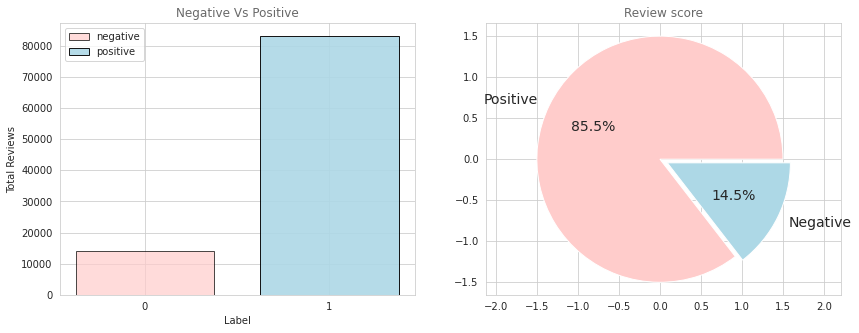

In [49]:
# Counting the review score with 1 and 0
score_value_counts = df.review_score.value_counts()

#calculating the percentage of each review type
print("Positive Reviews :", 
      score_value_counts[1], "(",(score_value_counts[1]/(score_value_counts[1]+score_value_counts[0]))*100,"%)")

print("Negative Reviews :",
      score_value_counts[0], "(",(score_value_counts[0]/(score_value_counts[1]+score_value_counts[0]))*100,"%)")
print('\n')

# plotting bar-plot and pie chart
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total Reviews')
plt.xlabel('Label')
plt.title('Negative Vs Positive',color='dimgrey')
plt.xticks([10,10.20],['0','1'])

# creating bar plots
plt.bar(10, 14112, color = '#FFCCCB', width = 0.15, alpha=0.7, label='negative', edgecolor='black')
plt.bar(10.20, 83143, color = '#ADD8E6', width = 0.15, alpha=0.9, label='positive', edgecolor='black')
plt.legend()

plt.subplot(1, 2, 2)
plt.pie([83143,14112], explode = (0, 0.1) ,colors={'#ADD8E6','#FFCCCB'}, labels=['Positive','Negative'], autopct='%1.1f%%', shadow=False,
        startangle=0, radius=1.5, labeldistance=1.1, textprops={'fontsize': 14}, frame=True, )

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Review score', color='dimgrey')
plt.show()

- 85.5% of the reviews are positive (value 1), with 84032 registers.

- 14.5% reviews are negative (value 0), with 13884 registers.

### Unique IDs

Checking the amount of unique ids values for sellers, products and costumers.

In [50]:
# checking unique ids
print("Total unique seller_id:",len((df.seller_id).unique()))
print("Total unique product_id:",len((df.product_id).unique()))
print("Total unique customer_id:",len((df.customer_unique_id).unique()))

Total unique seller_id: 3078
Total unique product_id: 31370
Total unique customer_id: 94720


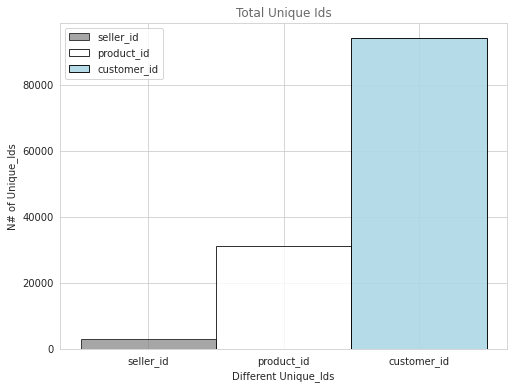

In [51]:
%matplotlib inline
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.ylabel('N# of Unique_Ids')
plt.xlabel('Different Unique_Ids')
plt.title('Total Unique Ids', color='dimgrey')
plt.xticks([10,10.25,10.50],['seller_id','product_id','customer_id'])

#creating bar plots
plt.bar(10, 3022, color = 'grey', width = 0.25, alpha=0.7, label='seller_id', edgecolor='black')
plt.bar(10.25,31053, color = 'white', width = 0.25, alpha=0.8, label='product_id', edgecolor='black')
plt.bar(10.50, 94087, color = '#ADD8E6', width = 0.25, alpha=0.9, label='customer_id', edgecolor='black')
plt.legend()
plt.show()

- Comparing unique ids above, it can be observed that the highest number of unique ids are for customers and least are for sellers.

### Payment types

Observing the payment methods present in the dataset, and plotting which were the most frequent.

- *Boleto: stands for Ticket.*

In [52]:
df.groupby('payment_type').size()

payment_type
boleto         19471
credit_card    74310
debit_card      1514
voucher         2621
dtype: int64

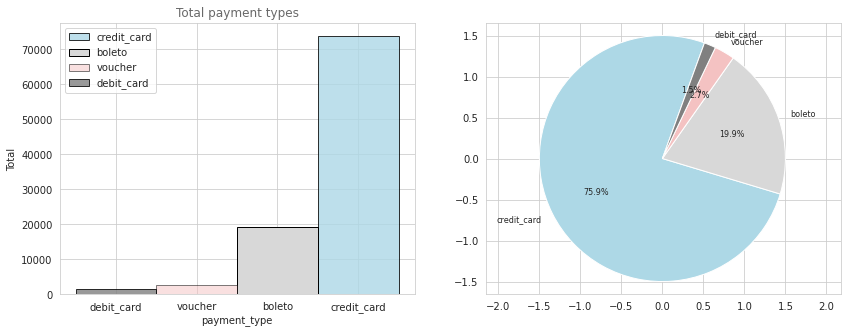

In [53]:
%matplotlib inline
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total')
plt.xlabel('payment_type')
plt.title('Total payment types',color='dimgrey')
plt.xticks([10,10.25,10.50,10.75], ['debit_card', 'voucher', 'boleto', 'credit_card'])

#creating bar plots
plt.bar(10.75,73816, color = '#ADD8E6', width = 0.25,alpha=0.8,label='credit_card', edgecolor='black')
plt.bar(10.50,19345, color = '#D8D8D8', width = 0.25,label='boleto', edgecolor='black')
plt.bar(10.25,2604, color = '#F4C2C2', width = 0.25,alpha=0.5,label='voucher', edgecolor='black')
plt.bar(10,1490, color = 'grey', width = 0.25,alpha=0.8,label='debit_card', edgecolor='black')


plt.legend()
plt.subplot(1, 2, 2)
labels = ['credit_card','boleto','voucher','debit_card']
colours = {'credit_card': '#ADD8E6', 'boleto': '#D8D8D8', 'voucher': '#F4C2C2', 'debit_card': 'grey'}

plt.pie([73816, 19345, 2604, 1490], explode=(0, 0, 0, 0), labels=labels, colors=[colours[key] for key in labels],
        autopct='%1.1f%%', shadow=False, startangle=70, radius=1.5, frame=True,textprops={'fontsize': 8})
plt.axis('equal') 
plt.show()

- Its possible to observe that most of the orders were by credit card.
- the second most used payment method is boleto.
- On the pie chart its clear that the payment by credit card is the majority, which is 75.9% 
- Baleto is used by 19.9% of the user and 4.2% of the user used voucher and debit card.

### Payment type grouped by reviews scores

The following will be presented the grouping of payment methods in relation to the review_score classified as Positive (1).

In [54]:
payments_ = pd.DataFrame(df.groupby('payment_type')['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby/19385591#19385591
payments_['total'] = list(pd.DataFrame(df.groupby('payment_type')['review_score']
                                       .agg([('total','count'),('avg','mean')]))['total'])

payments_['avg']   = list(pd.DataFrame(df.groupby('payment_type')['review_score']
                                       .agg([('total','count'),('avg','mean')]))['avg'])
# sorting dataframe
payments_ = payments_.sort_values(by=['total'], ascending=True)

In [55]:
payments_

payment_type  review_score  total       avg
2   debit_card          1321   1514  0.872523
3      voucher          2222   2621  0.847768
0       boleto         16766  19471  0.861075
1  credit_card         63723  74310  0.857529

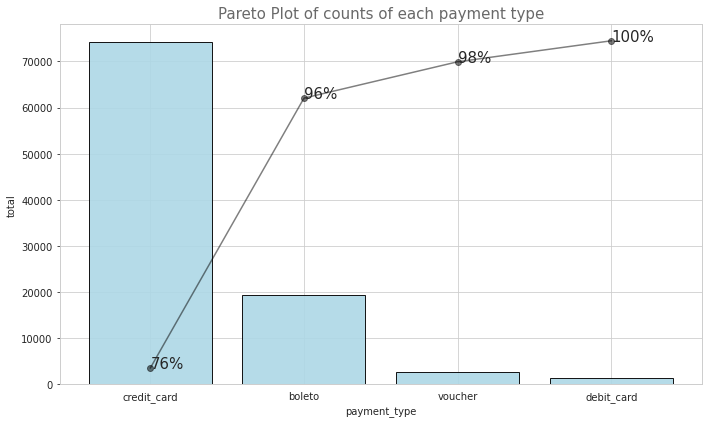

In [56]:
x = 'payment_type'
y = 'total'
show_pct_y=False
pct_format='{0:.0%}'

xlabel = x
ylabel = y
tmp = payments_.sort_values(y, ascending=False)
x = tmp[x].values
y = tmp[y].values
weights = y/y.sum()
cumsum = weights.cumsum()

fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(x, y,color='#ADD8E6',edgecolor='black',alpha=0.9)
ax1.set_xlabel(xlabel)
ax1.set_ylabel(ylabel)

ax2 = ax1.twinx()
ax2.plot(x, cumsum, '-ro', alpha=0.5,color='black')
ax2.set_ylabel('', color='r')
ax2.tick_params('y', colors='r')

vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# hide y-labels on right side
if not show_pct_y:
    ax2.set_yticks([])

formatted_weights = [pct_format.format(x) for x in cumsum]
for i, txt in enumerate(formatted_weights):
    ax2.annotate(txt, (x[i], cumsum[i]),fontsize=15)    


plt.title("Pareto Plot of counts of each payment type" ,color='dimgrey',fontsize=15)

plt.tight_layout()
plt.show()

**Note:**

The pareto Plot above show that:
- 96% of the users paid by credit card and boleto.
- Credit card, boleto and voucher it covers 98% of users. 

It can be said that 98% of the users might pay using credit_card or boleto or voucher.

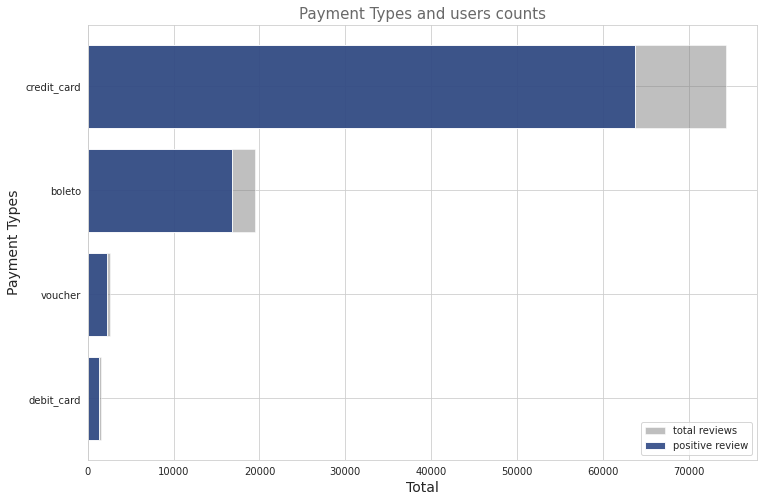

In [57]:
# plotting categorical feature related with target variable
plt.figure(figsize=(12,8))
p1=plt.barh(payments_.payment_type, payments_.total, color='grey', alpha=0.5)
p2=plt.barh(payments_.payment_type, payments_.review_score, color='#2E4884', alpha=0.9)

plt.title('Payment Types and users counts', fontsize=15, color='dimgrey')
plt.ylabel('Payment Types', fontsize=14)
plt.xlabel('Total',fontsize=14)
plt.legend((p1[0], p2[0]), ('total reviews', 'positive review'))

plt.show()

The stacket plot above shows that: 
- Most of the customer whose paid by credit card gave positive reviews, same for boleto, voucher and the debit card.

In [58]:
state  = df['customer_state'].value_counts().iloc[:15]
state["percentage"] = state.values/state.sum()

fig = px.bar(x=state.index , y=state.values, text=state.values, labels={'x': 'States', 'y': 'Count'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_line_width=1.5, opacity=0.7)
fig.update_layout(title_text='Top 15 user`s states of Brazil')

In [59]:
state.percentage[0], state.percentage[1], state.percentage[2]

(0.43684512550211474, 0.13387600688614482, 0.12184650698178572)

- 43.68% of the customers are from São Paulo (SP).
- 13.38% from Rio de Janeiro (RJ).
- 12.18% from Minas Gerais (MG).
- With this it can be said that more than 50% of users are from these three states, led by SP with its 43.68%
- Analysing the map above, it is possible to observe that these three states are neighbors, which are part of the Southeast region of Brazil.

So then, it will be observed what kind of review the users of these states gave.

In [60]:
# function to create the stackplot
def define_stack_plot(data, xtick, col_n1, col_n2='total'):    
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20, 5))
    #bar 1
    p1 = plt.bar(ind, data[col_n2].values, color = 'grey', alpha=0.5)
    #bar 2
    p2 = plt.bar(ind, data[col_n1].values, color= '#2E4884', alpha=0.8)

    plt.ylabel('Reviews')
    plt.title('Percentage of review score')
    plt.xticks(ind-0.1, list(data[xtick].values), rotation=0)
    plt.legend((p1[0], p2[0]), ('total reviews', col_n1))
    plt.show()

In [61]:
customer_review_state = pd.DataFrame(df.groupby('customer_state')['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

customer_review_state['total'] = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
customer_review_state['Avg'] = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])

customer_review_state = customer_review_state.rename(columns={'review_score':'positive_review'})
customer_review_state = customer_review_state.sort_values(by=['total'], ascending=False)

customer_review_state

customer_state  positive_review  total       Avg
25             SP            36160  41108  0.879634
18             RJ            10046  12598  0.797428
10             MG            10004  11466  0.872493
22             RS             4709   5412  0.870103
17             PR             4380   4972  0.880933
23             SC             3076   3584  0.858259
4              BA             2705   3319  0.815005
6              DF             1807   2115  0.854374
7              ES             1707   1998  0.854354
8              GO             1706   1994  0.855567
15             PE             1361   1631  0.834457
5              CE             1064   1317  0.807897
13             PA              771    957  0.805643
12             MT              774    896  0.863839
9              MA              576    735  0.783673
11             MS              609    707  0.861386
14             PB              440    526  0.836502
16             PI              399    488  0.817623
19             RN              411    478  0.859833
1              AL              312    408  0.764706
24             SE              272    344  0.790698
26             TO              240    278  0.863309
20             RO              213    246  0.865854
2              AM              125    145  0.862069
0              AC               68     81  0.839506
3              AP               62     67  0.925373
21             RR               35     46  0.760870

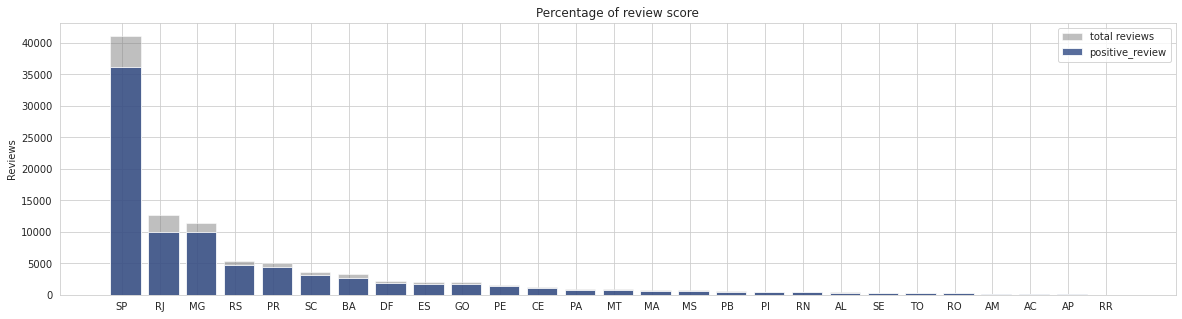

In [62]:
define_stack_plot(customer_review_state, 'customer_state', col_n1='positive_review', col_n2='total') # xxxxx

The plot above shows data reviews in relation to the total number of positive reviews given by users.
- In SP, the total number of reviews was 41108, with 36160 being positive.
- In RJ the total number was 12598, being 10046 positive.
- In MG, despite having the number of reviews a little lower (11466), the number of positives was almost the same (10004) as in the state of RJ.

The same analysis will be done next, being now for the negative reviews.

In [63]:
customer_review_state = pd.DataFrame(df.groupby('customer_state')['review_score'].agg(lambda x: x.eq(0).sum())).reset_index()

customer_review_state['total'] = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
customer_review_state['Avg'] = list(pd.DataFrame(df.groupby('customer_state')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])

customer_review_state = customer_review_state.rename(columns={'review_score': 'negative_review'})
customer_review_state = customer_review_state.sort_values(by=['total'], ascending=False)

customer_review_state

customer_state  negative_review  total       Avg
25             SP             4948  41108  0.879634
18             RJ             2552  12598  0.797428
10             MG             1462  11466  0.872493
22             RS              703   5412  0.870103
17             PR              592   4972  0.880933
23             SC              508   3584  0.858259
4              BA              614   3319  0.815005
6              DF              308   2115  0.854374
7              ES              291   1998  0.854354
8              GO              288   1994  0.855567
15             PE              270   1631  0.834457
5              CE              253   1317  0.807897
13             PA              186    957  0.805643
12             MT              122    896  0.863839
9              MA              159    735  0.783673
11             MS               98    707  0.861386
14             PB               86    526  0.836502
16             PI               89    488  0.817623
19             RN               67    478  0.859833
1              AL               96    408  0.764706
24             SE               72    344  0.790698
26             TO               38    278  0.863309
20             RO               33    246  0.865854
2              AM               20    145  0.862069
0              AC               13     81  0.839506
3              AP                5     67  0.925373
21             RR               11     46  0.760870

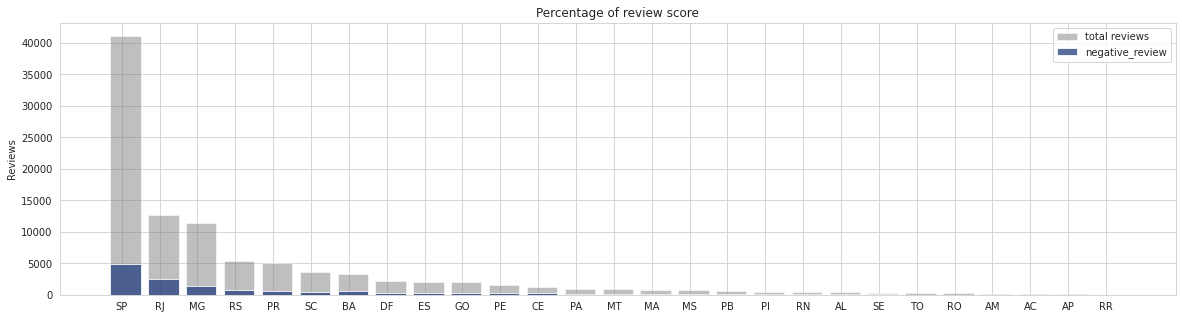

In [64]:
define_stack_plot(customer_review_state, 'customer_state', col_n1='negative_review', col_n2='total')

- In SP, the total number of reviews was 41108, with 4948 being negative.
- In RJ the total number was 12598, being 2552 negative.
- In MG the total number was 11466, being 1462 negative.

### Product category name

The analysis of the top product category will be discussed below.

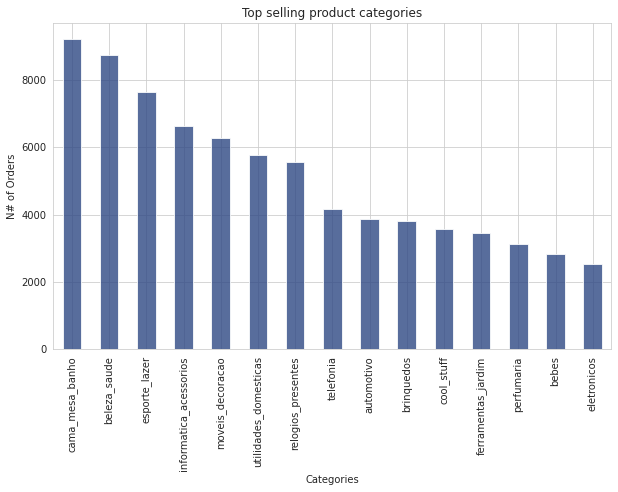

In [65]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
# taking the top 15 categories only
ax = df.product_category_name.value_counts().sort_values(ascending=False)[0:15].plot(kind='bar', color = '#2E4884', alpha=0.8)
ax.set_title("Top selling product categories")
ax.set_xlabel("Categories")
plt.xticks(rotation=90)
ax.set_ylabel("N# of Orders")
plt.show()

The plot Top selling product categories shows:
- The most ordered products category are from cama_mesa_banho (bed_bath_table), beleza_saude (health beauty) and esport_lazer (sports leisure). 

- The least ordered products category are from eletronicos (eletronics).

#### Grouping product categories by the review_score classified as positive (value 1).

In [66]:
product_category = pd.DataFrame(df.groupby('product_category_name')['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

product_category['total'] = list(pd.DataFrame(df.groupby('product_category_name')['review_score'].agg([('total','count'),('avg','mean')]))['total'])
product_category['avg']   = list(pd.DataFrame(df.groupby('product_category_name')['review_score'].agg([('total','count'),('avg','mean')]))['avg'])
product_category = product_category.sort_values(by=['total'], ascending=True)

product_category

product_category_name  review_score  total       avg
67             seguros_e_servicos             1      2  0.500000
37  fashion_roupa_infanto_juvenil             6      7  0.857143
60                       pc_gamer             5      8  0.625000
46                     la_cuisine            10     11  0.909091
17              cds_dvds_musicais            12     12  1.000000
..                            ...           ...    ...       ...
54               moveis_decoracao          5265   6285  0.837709
44         informatica_acessorios          5573   6634  0.840066
32                  esporte_lazer          6645   7627  0.871247
11                   beleza_saude          7631   8731  0.874012
13                cama_mesa_banho          7704   9225  0.835122

[73 rows x 4 columns]

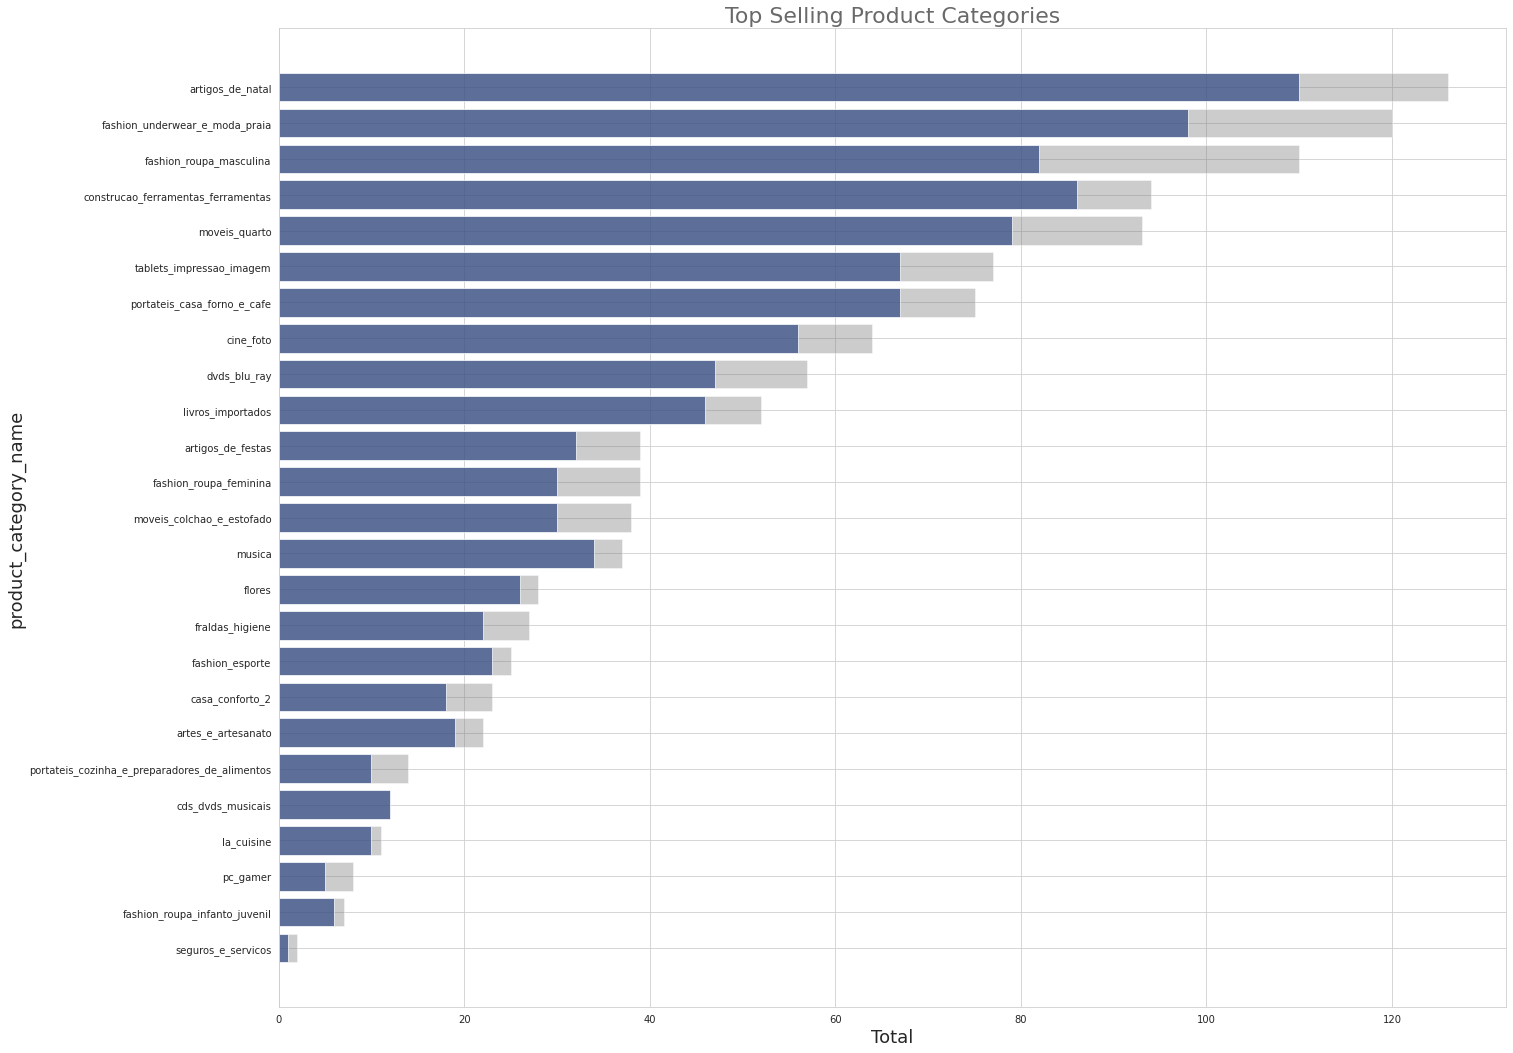

In [67]:
plt.figure(figsize=(22,18))
plt.barh(product_category.product_category_name[0:25], product_category.total[0:25],color='grey', alpha=0.4)
plt.barh(product_category.product_category_name[0:25], product_category.review_score[0:25], color='#2E4884', alpha=0.7)

plt.title('Top Selling Product Categories', fontsize=22, color='dimgrey')
plt.ylabel('product_category_name', fontsize=18)
plt.xlabel('Total', fontsize=18)
plt.show()

The plot above shows the total reviews and the positive reviews.
- The most reviews for the product category bed_bath_table are positive, and this trend continues for the other categories.

#### Frequency of orders vs. Consumers

Next, the frequency of orders in relation to customers will be analysed, thus showing the number of orders placed by users.

Text(0.5, 1.0, 'Number of orders per customer')

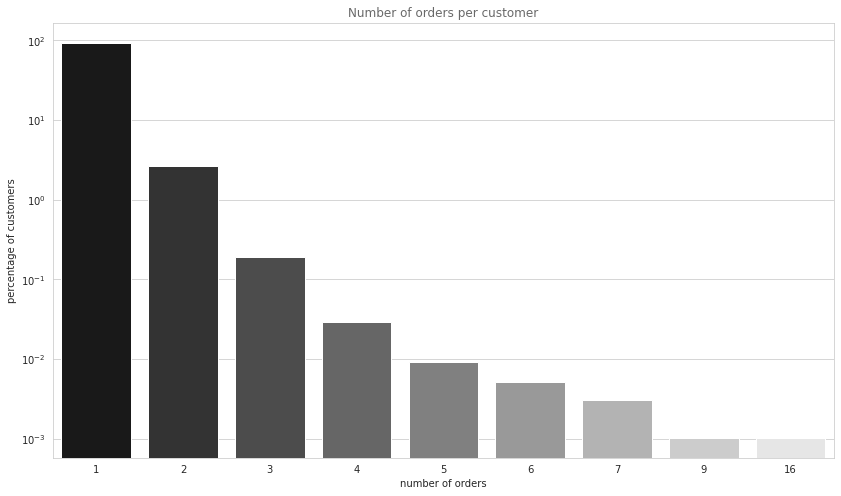

In [68]:
# plotting frequency orders vs the number of consumers 
plt.figure(figsize=(14,8))

# counting the consumers and converting it into percentage to visualize the distribution
num_orders = df['customer_unique_id'].value_counts().value_counts()/df.shape[0]*100
num_orders = num_orders.reset_index()

# renaming the columns
num_orders.rename(columns={'index':'number of orders', 'customer_unique_id':'percentage of customers'},inplace=True)

# plotting bar plot
sns.barplot(data=num_orders, x='number of orders', y='percentage of customers', palette='gray')
plt.yscale('log') #log scale
plt.title('Number of orders per customer', color='dimgrey')

Observing the plot above, it can be said that:
- Most users only ordered once.
- The number of users who placed the second order is not that far from those who placed just one, but this trend decreases with the increase in the number of orders.

In [69]:
# formatting matplotlib axes, setting borders and colors
def format_spines(ax, right_border=True):
    # setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

In [70]:
# parameters,
def single_countplot(df, ax, x=None, y=None, top=None, order=True, hue=False, palette='plasma', width=0.75, sub_width=0.3,
                     sub_size=12):

    # checking plotting for breaking some categorical variable
    ncount = len(df)
    if x:
        col = x
    else:
        col = y

    # checking the top categories plot
    if top is not None:
        cat_count = df[col].value_counts()
        top_categories = cat_count[:top].index
        df = df[df[col].isin(top_categories)]

    # validating others arguments and plotting graph
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

    # formatting axes
    format_spines(ax, right_border=False)

    # inserting percentage label
    if x:
        for p in ax.patches:
            x = p.get_bbox().get_points()[:, 0]
            y = p.get_bbox().get_points()[1, 1]
            ax.annotate('{}\n{:.1f}%'.format(int(y), 100. * y / ncount), (x.mean(), y), ha='center', va='bottom')
    else:
        for p in ax.patches:
            x = p.get_bbox().get_points()[1, 0]
            y = p.get_bbox().get_points()[:, 1]
            ax.annotate('{} ({:.1f}%)'.format(int(x), 100. * x / ncount), (x, y.mean()), va='center')

### Order Status

Analysis of the Order Status of orders placed by customers.

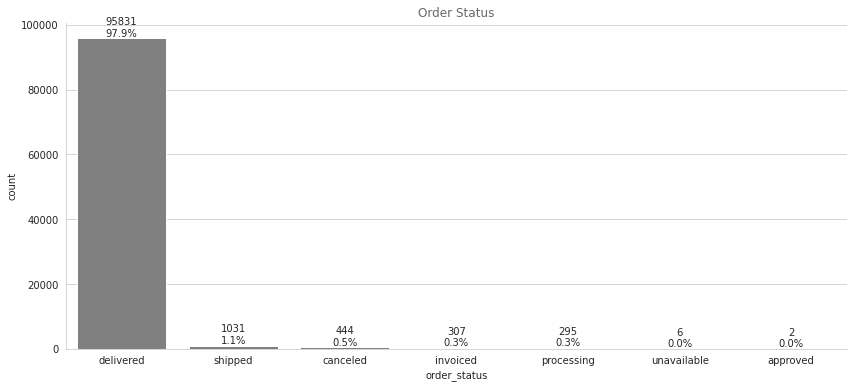

In [71]:
#by using custom countplots in (viz_utils)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
single_countplot(df, x='order_status', ax=ax,palette=['grey'])
plt.title('Order Status',color='dimgrey')
plt.show()

- The plot shows that 97.9% of the orders status were delivered.
- Followed by the rest of the order status, by a low percentage of shipped, canceled, invoiced, processing, unavailable and approved.

#### Plotting the status of orders in relation reviews written by users on their purchase.

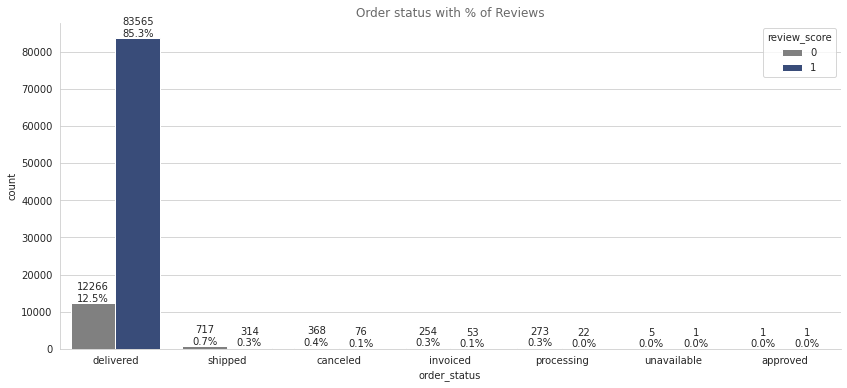

In [72]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14, 6))
single_countplot(df, x='order_status', ax=ax,palette=['grey','#2E4884'], hue='review_score')
plt.title('Order status with % of Reviews',color='dimgrey')
plt.show()

- The plot shows that the order status as delivered, the most reviews as classified as positive, 85.3% and only 12.8% are negative.

- For other status, the percentage is below zero for both types of review.

### Time analysis

Next, the data analysis of the temporal variables will be evaluated. For this, new variables were created for the dataframe, where the months, years, description of the month, days of the week and in which part of the day the purchase was made were extracted.

In [73]:
# calulating number of days for the data is taken
print(df.order_approved_at.max() - df.order_approved_at.min(), ' from ', 
      df.order_approved_at.min(), ' to ', df.order_approved_at.max())

699 days 07:56:34  from  2016-10-04 09:43:32  to  2018-09-03 17:40:06


In [74]:
# extracting features for purchase date

# adding year Example :2016-10-04 09:43:32 => 2016
df['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year) 

# adding month Example :2016-10-04 09:43:32 => 10
df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month)

# adding  month in short form Example :2016-10-04 09:43:32 => 10 => Oct
df['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))

# adding month and year Example :2016-10-04 09:43:32 => 201610
df['order_purchase_year_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))

# adding month, year and date  Example :2016-01-01 09:43:32 => 20161004
df['order_purchase_date'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))
df['order_purchase_month_year'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime("%b-%y"))

# purchase date - adding the day and day of week
df['order_purchase_day'] = df['order_purchase_timestamp'].apply(lambda x: x.day)
df['order_purchase_dayofweek'] = df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df['order_purchase_dayofweek_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# purchase date - adding the hour and time of the day
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df['order_purchase_hour'] = df['order_purchase_timestamp'].apply(lambda x: x.hour)
df['order_purchase_time_day'] = pd.cut(df['order_purchase_hour'], hours_bins, labels=hours_labels)

df.head()

order_id  ... order_purchase_time_day
0  e481f51cbdc54678b7cc49136f2d6af7  ...                 Morning
3  128e10d95713541c87cd1a2e48201934  ...               Afternoon
4  0e7e841ddf8f8f2de2bad69267ecfbcf  ...               Afternoon
5  bfc39df4f36c3693ff3b63fcbea9e90a  ...                   Night
6  53cdb2fc8bc7dce0b6741e2150273451  ...                   Night

[5 rows x 43 columns]

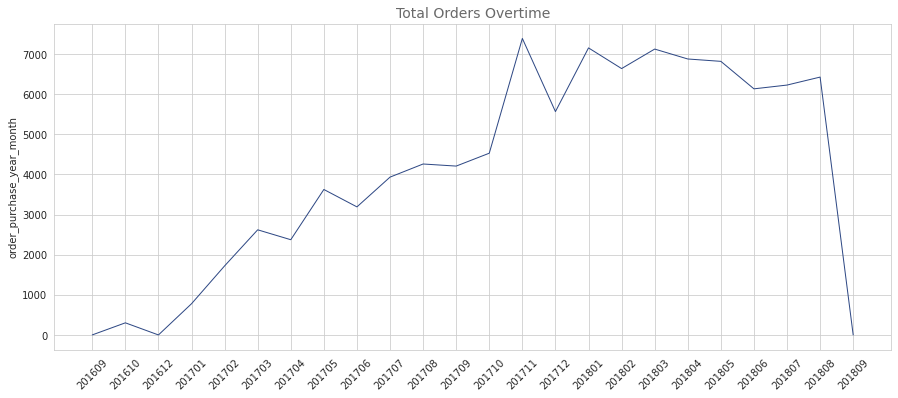

In [75]:
# 201609 => 09-2016   201809 => 09-2018
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))
sns.lineplot(data=df['order_purchase_year_month'].value_counts().sort_index(), color='#2E4884', linewidth=1)
plt.title('Total Orders Overtime', size=14, color='dimgrey')
plt.xticks(rotation=45)
plt.show()

- The plot shows the number of sales increases from 2016-09 to 2017-11, when it reaches the peak and then starts to decrease for a short period.
- It can be said that the number of orders from old users increased or the number of new customers increased.

#### Monthly

Next, the number of monthly requests for specific years will be analysed, and then the number of negative and positive reviews for the before mentioned periods.

In [76]:
df_month = pd.DataFrame()
df_month['date'], df_month['review_score'] = list(df.order_approved_at),list(df.review_score)
df_month = df_month.dropna()
df_month = df_month.sort_values(by=['date'])

df_month

date  review_score
89809 2016-10-04 09:43:32             1
50939 2016-10-04 10:18:57             0
46286 2016-10-04 10:19:23             1
54793 2016-10-04 10:25:46             0
95865 2016-10-04 10:28:07             0
...                   ...           ...
40563 2018-08-29 14:30:23             1
53867 2018-08-29 14:31:07             1
91441 2018-08-29 15:05:22             1
26309 2018-08-29 15:10:26             1
69569 2018-09-03 17:40:06             0

[97916 rows x 2 columns]

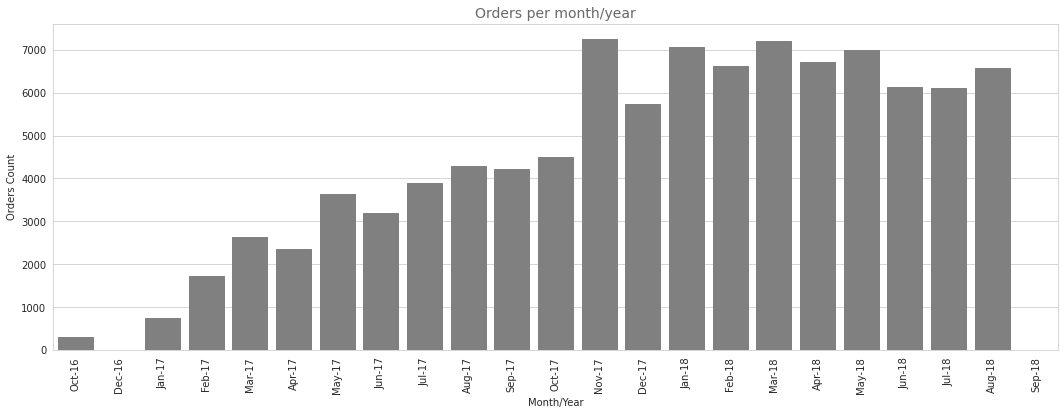

In [77]:
df_month['monthcount'] = list(df_month.date.apply(lambda x: x.strftime("%b-%y")))

# plotting number of orders per month/year
plt.figure(figsize=(18,6))
g = sns.countplot(x=df_month.monthcount, data=df_month, color='grey', edgecolor='grey')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel('Month/Year')
g.set_ylabel('Orders Count')
plt.title('Orders per month/year', size=14, color='dimgrey');

The plot of orders per month/year shows that:

- December/2016 had the lowest number of orders.
- November/2017 had the highest number of orders, reaching just over 7000 orders.

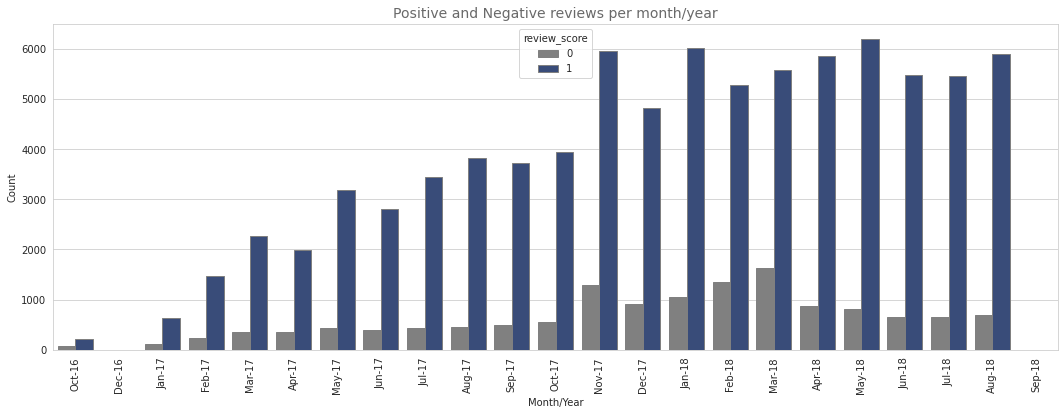

In [78]:
# plotting number of positive and negative reviews per month/year
plt.figure(figsize=(18,6))
g = sns.countplot(x=df_month.monthcount,hue='review_score', data=df_month, palette=['grey','#2E4884'], edgecolor='grey')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xlabel('Month/Year')
g.set_ylabel('Count')
plt.title('Positive and Negative reviews per month/year', size=14, color='dimgrey');

The plot shows the total number of negative and positive reviews for each order per month/year.

- Most reviews were rated positive.
- Previously, it was seen that November/2017 had the highest number of orders, but the greatest number of reviews were registered in May/2018, with more than 6000 records.

#### Weekdays

Next, the number of reviews registered overtime will be addressed, in times of the day and on weekdays. Showing the total amount and its percentage.

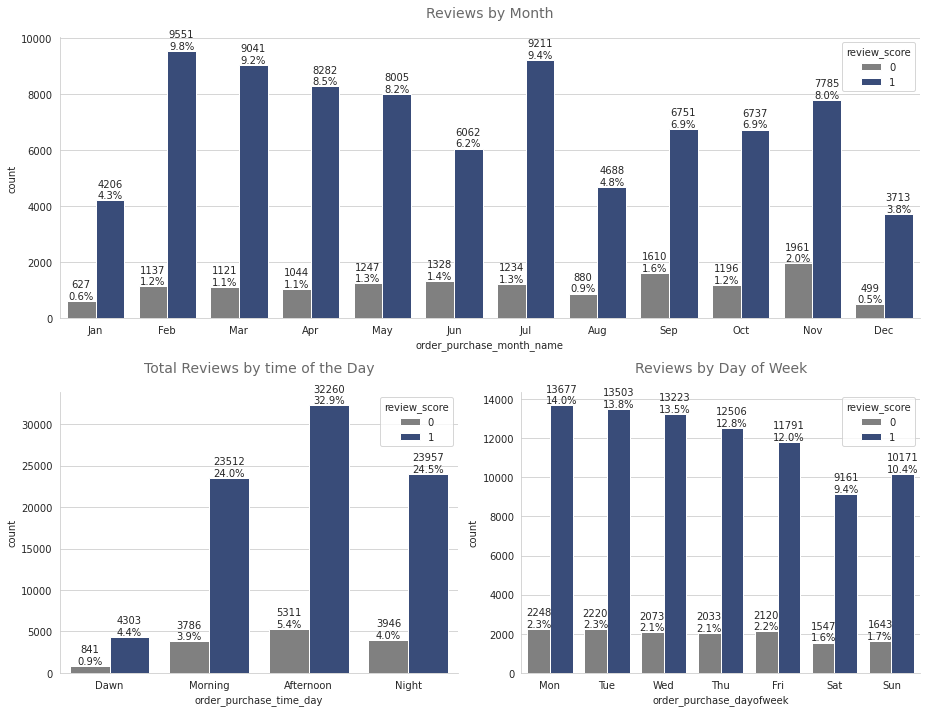

In [79]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[0, :])
ax3 = fig.add_subplot(gs[1, 1])

# reviews by time of the day
single_countplot(df, x='order_purchase_time_day', ax=ax1, order=False, palette=['grey','#2E4884'], hue='review_score')
ax1.set_title('Total Reviews by time of the Day', size=14, color='dimgrey', pad=20)

# reviews by month
single_countplot(df, x='order_purchase_month_name', ax=ax2, order=False, palette=['grey','#2E4884'], hue='review_score')

ax2.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec'])
ax2.set_title('Reviews by Month', size=14, color='dimgrey', pad=20)

single_countplot(df, x='order_purchase_dayofweek', ax=ax3, order=False, palette=['grey','#2e4884'], hue='review_score')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax3.set_xticklabels(weekday_label)
ax3.set_title('Reviews by Day of Week', size=14, color='dimgrey', pad=20)
plt.tight_layout()

plt.show()

**Reviews by month shows that:**
- The highest number of positive reviews, which were registered between 2016 and 2018, were given in February, with 9551 (9.8%).
- In the months of March and July, more than 9000 reviews were registered, above the 9% positives.

**Total Reviews by time of the Day shows that:**
- The highest number of orders were evaluated in the tared period, reaching 32.9% positive reviews and 5.4% negative.
- The lowest number was during the night, with 4.4% positive and 0.9% negative.

**Reviews by day of week shows that:**
- The highest number of reviews were made on Monday, with a total of 14% positive and 2.3% negative. Followed by Tuesday with 13.8% positive and 2.3% negative.
- The lowest number of reviews registered were on Saturday with a total of 9.4% positive and 1.6% negative.
- It can be concluded that users report their experiences more frequently during weekdays.

#### Checking the day the order was delivered.

In [80]:
df['day_to_delivery'] = ((df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days)

In [81]:
df_delivery = pd.DataFrame()
# df_delivery['day_to_delivery'], df_delivery['review_score'] = list(df.day_to_delivery), list(df.review_score)
df_delivery['day_to_delivery'] = list(df.day_to_delivery)
df_delivery = df_delivery.dropna()
df_delivery

day_to_delivery
0                    8
1                    2
2                    5
3                   14
4                   13
...                ...
97911               14
97912               12
97913               37
97914                8
97915                7

[97916 rows x 1 columns]

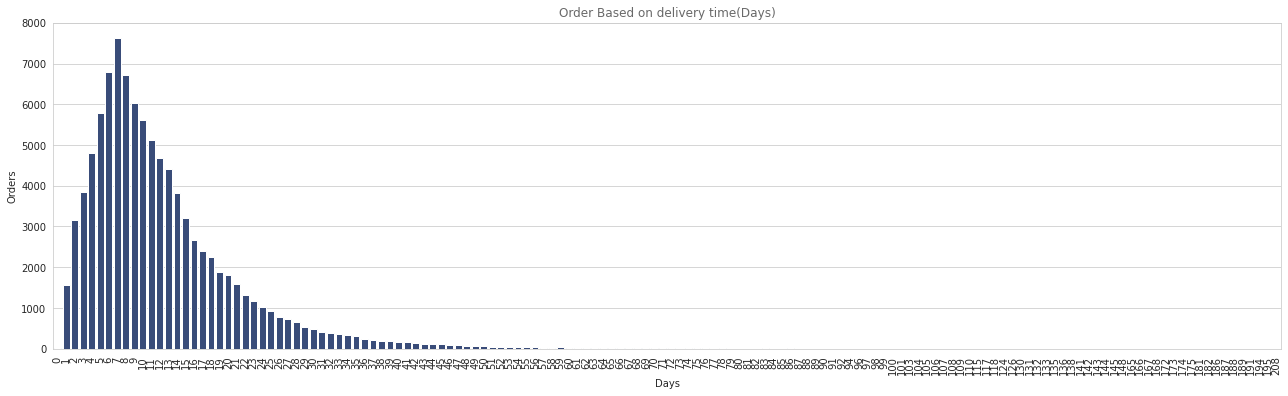

In [82]:
plt.figure(figsize=(22,6))
plt.title('Order Based on delivery time(Days)', color='dimgrey')
pl = sns.countplot(x=df_delivery.day_to_delivery, data=df_delivery, color='#2E4884')
pl.set_xticklabels(pl.get_xticklabels(), rotation=90)
pl.set_xlabel('Days')
pl.set_ylabel('Orders');

- Most orders were delivered in 7 days.
- A good quantity of orders were delivered in only 1 and 2 days.
- The quantity of products delivered more than 30 days is low.

### Analysis of Numerical Features

Next, the numerical variables will be evaluated and analysed.

#### Price

In [83]:
# function to plot the distribution graph
def plot_distribution(df, hue_, column, title):
    plt.figure()
    sns.set_style("whitegrid")
    ax = sns.FacetGrid(df, hue=hue_, height=5, aspect=2.0, palette=['red','black'])
    ax = ax.map(sns.distplot, column).add_legend();
    plt.title(title)
    plt.show()

<Figure size 432x288 with 0 Axes>

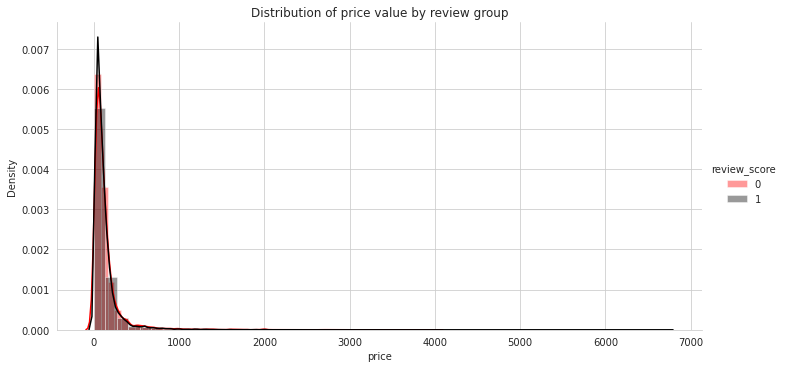

In [84]:
# distributions of product price by review group
plot_distribution(df, "review_score", "price", 'Distribution of price value by review group')

The price distribution plot for positive and negative shows that:
- There is overlap of both the distribution for both, positive and negative.
- It's not possible to classify them based only on price feature.

#### Freight value

<Figure size 432x288 with 0 Axes>

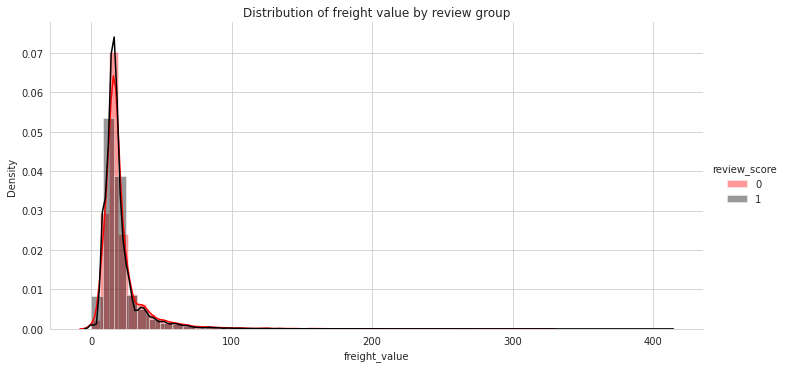

In [85]:
# distributions of freight_value by review group
plot_distribution(df, "review_score", "freight_value", 'Distribution of freight value by review group')

The freight value distribution plot for positive and negative shows that:

- There is overlap of both the distribution for both, positive and negative.
- It's not possible to classify them based only on price feature.

#### Product height in cm

<Figure size 432x288 with 0 Axes>

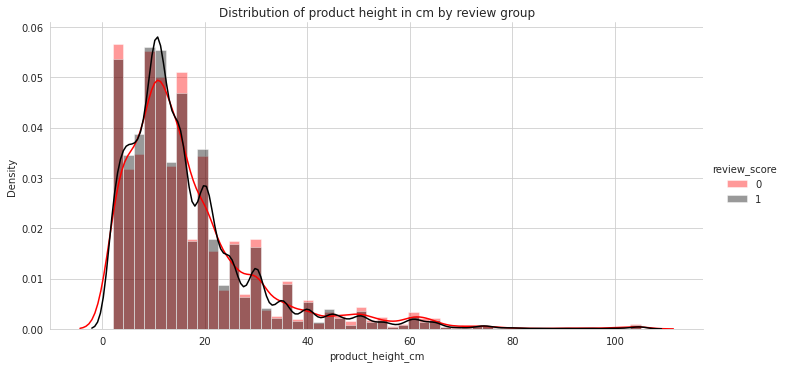

In [86]:
# distributions of product_height_cm by review group
plot_distribution(df, "review_score", "product_height_cm", 'Distribution of product height in cm by review group')

The product height value distribution plot for positive and negative shows that:

- Most products are less than 20cm tall.

#### Product weight

<Figure size 432x288 with 0 Axes>

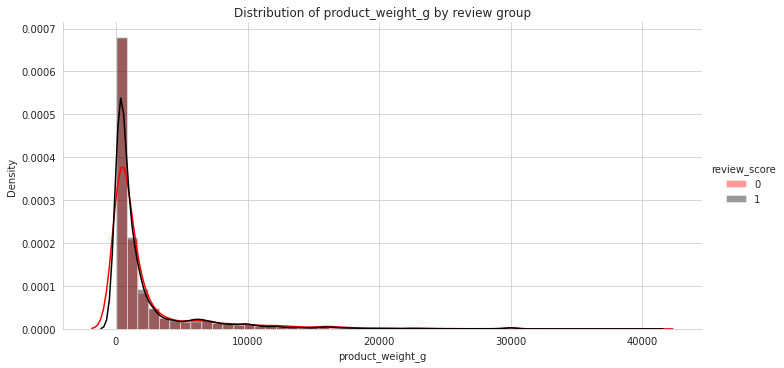

In [87]:
# distributions of product_weight_g by review group
plot_distribution(df, "review_score", "product_weight_g", 'Distribution of product_weight_g by review group')

The product weight value distribution plot for positive and negative shows that:

- Most products are less than 5000 gm.

#### Payment value

<Figure size 432x288 with 0 Axes>

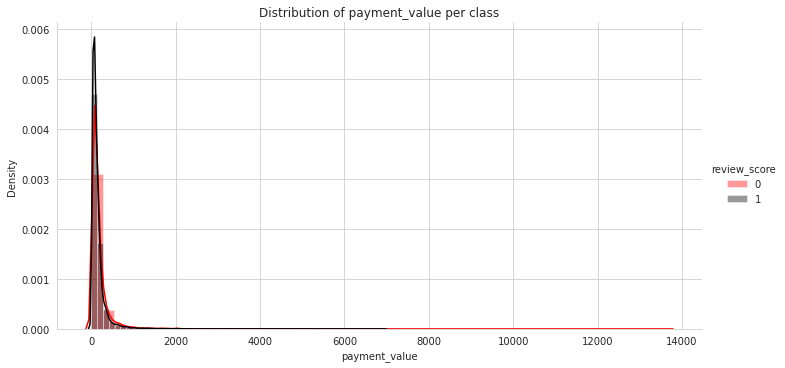

In [88]:
# distriution plot of payment_value
plot_distribution(df, "review_score", "payment_value", 'Distribution of payment_value per class')

### Boxplots

Next, the boxplot will show the distribution of data for the numerical variables, showing how they are distributed and the median (represented by the box).

In [89]:
def plot_boxplot(box_data, labels, title):
    plt.figure(figsize=(14,6))
    plt.boxplot(box_data, labels=labels, vert=False)
    plt.title(title)
    plt.show()

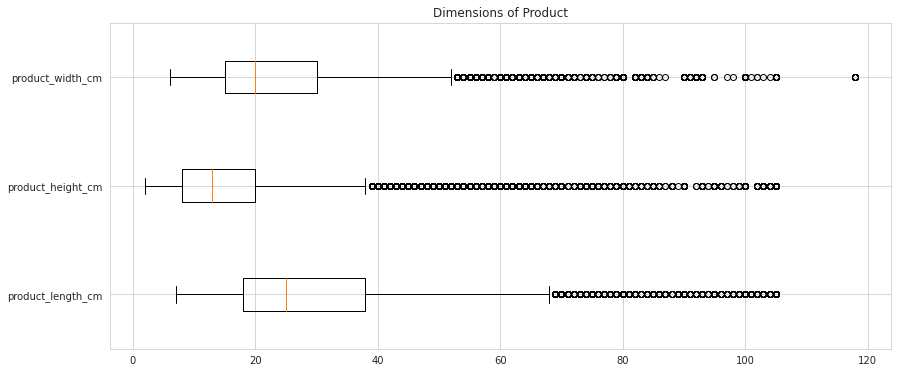

In [90]:
plot_boxplot([df.product_length_cm, df.product_height_cm, df.product_width_cm],
             ['product_length_cm', 'product_height_cm', 'product_width_cm'],
                "Dimensions of Product")

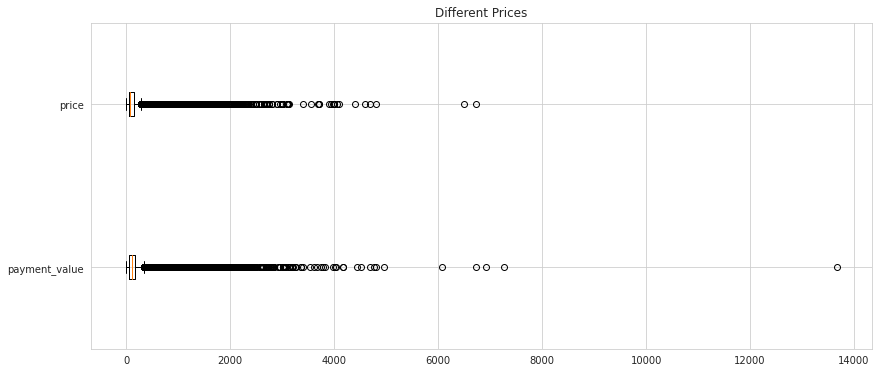

In [91]:
plot_boxplot([df.payment_value,df.price], ['payment_value', 'price'], "Different Prices")

### Scatterplots

The same will be done using scartterplots.

In [92]:
def plot_scatterplot(df, x_, y_, hue_, title):
    plt.figure(figsize=(8,5))
    sns.set_style("whitegrid")
    ax = sns.scatterplot(x=x_, y=y_, data=df, hue=hue_, palette=['#2E4884','grey'])
    plt.title(title)
    plt.show()

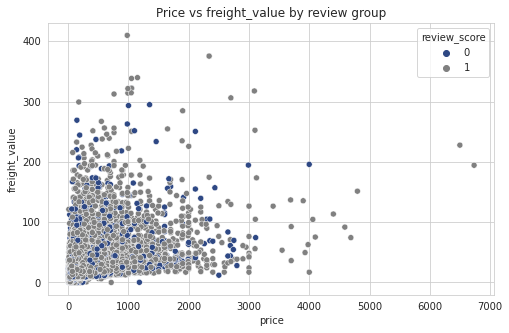

In [93]:
plot_scatterplot(df, "price", "freight_value", "review_score", "Price vs freight_value by review group")

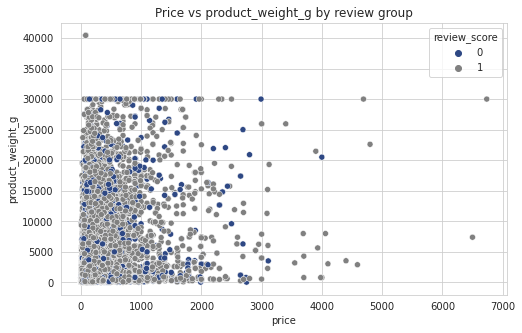

In [94]:
plot_scatterplot(df, "price", "product_weight_g", "review_score", "Price vs product_weight_g by review group")

- Analysing the two scatter plots above, it's hard to say anything about the reviews on the basis of these plots, the data points are not separable based on the reviews they are completely mixed data.

### Analysis  of price and number of orders per month

Analysis of price evolution and total orders per month.

For this, a dataframe was created, using the grouping of order_purchase_month_name and price.

In [95]:
df_month = df[['order_purchase_month_name', 'price']].groupby('order_purchase_month_name').sum()

In [96]:
months_desc = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec']
#days_weeks = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']

prices_list = list(df_month['price'])
index_list = list(df_month.index)

# dict of months and price value
response = {index_list[i]: prices_list[i] for i in range(len(index_list))}

#sorting by month using the months descriptions
response = dict(OrderedDict(sorted(response.items(), key = lambda x : months_desc.index(x[0]))))

response

{'Apr': 1236252.4199999932,
 'Aug': 1304529.5599999784,
 'Dec': 681879.0900000153,
 'Feb': 993768.1400000325,
 'Jan': 966615.0900000343,
 'Jul': 1256230.5699999856,
 'Jun': 1191359.6699999997,
 'Mar': 1233646.4299999864,
 'May': 1349392.9599999608,
 'Nov': 899877.7200000293,
 'Oct': 639770.0900000128,
 'Sep': 556056.3200000104}

In [97]:
# grouping order_purchase_month_name with positive reviews_scores
purchase_month = pd.DataFrame(df.groupby('order_purchase_month_name')
                              ['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

purchase_month['total'] = list(pd.DataFrame(df.groupby('order_purchase_month_name')
                                            ['review_score'].agg([('total','count'),('avg','mean')]))['total'])

purchase_month['avg'] = list(pd.DataFrame(df.groupby('order_purchase_month_name')
                                          ['review_score'].agg([('total','count'),('avg','mean')]))['avg'])

purchase_month = purchase_month.sort_values(by=['total'], ascending=True)
purchase_month

order_purchase_month_name  review_score  total       avg
11                       Sep          3713   4212  0.881529
10                       Oct          4206   4833  0.870267
2                        Dec          4688   5568  0.841954
9                        Nov          6062   7390  0.820298
4                        Jan          6737   7933  0.849237
3                        Feb          6751   8361  0.807439
0                        Apr          8005   9252  0.865218
6                        Jun          8282   9326  0.888055
7                        Mar          7785   9746  0.798789
5                        Jul          9041  10162  0.889687
8                        May          9211  10445  0.881857
1                        Aug          9551  10688  0.893619

In [98]:
purchase_month = {list(purchase_month.order_purchase_month_name)[i]: list(purchase_month.total)[i] for i in range(len(purchase_month))}
purchase_month = dict(OrderedDict(sorted(purchase_month.items(), key =lambda x : months_desc.index(x[0]))))

purchase_month

{'Apr': 9252,
 'Aug': 10688,
 'Dec': 5568,
 'Feb': 8361,
 'Jan': 7933,
 'Jul': 10162,
 'Jun': 9326,
 'Mar': 9746,
 'May': 10445,
 'Nov': 7390,
 'Oct': 4833,
 'Sep': 4212}

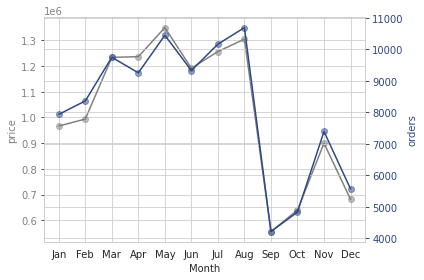

In [99]:
%matplotlib inline
sns.set_style("whitegrid")

fig, ax1 = plt.subplots()

ax1.set_xlabel('Month')
ax1.set_ylabel('price', color='grey')
ax1.plot(list(response.keys()),list(response.values()), color='grey')
ax1.plot(list(response.keys()),list(response.values()), 'C0o', alpha=0.5, color='grey')
ax1.tick_params(axis='y', labelcolor='grey')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('orders', color='#2E4884')  # we already handled the x-label with ax1
ax2.plot(list(response.keys()),list(purchase_month.values()), color='#2E4884')
ax2.plot(list(response.keys()),list(purchase_month.values()),'C0o', alpha=0.5, color='#2e4884')
ax2.tick_params(axis='y', labelcolor='#2E4884')
#creating  points 


fig.tight_layout( )  # otherwise the right y-label is slightly clipped
plt.show()

* It can observed that there is same pattern of total sales and the total order per month between 2016 and 2018.



# Clustering

Usually, for customer behaviour understanding, clustering is applied to the dataset to promote customer segmentation. The results can give insights of buying patterns and other important information to the marketing team. As it was observed on the plots, the dataset contains many different kind of information about clients' pattern. Selecting the ones that are more related to the customers, clustering can be performed to sort them into groups (Customer Segmentation).

Before performing Clustering techniques, some features were dropped because they do not bring any insight to the analysis of the clusters. THe remaining features were processed in a pipeline to standardise them and prepare the new dataframe. The model took a lot of time to run. That is why a random 10% sample of the dataset was taken to perform the analysis.

In [100]:
# Selecting features to build the model
columns = ['order_status', 'customer_state', 'order_item_id', 'price', 'freight_value', 'payment_sequential',
           'payment_type', 'payment_installments', 'payment_value', 'order_purchase_year', 'order_purchase_month',
           'order_purchase_day', 'order_purchase_hour']

cluster_df = df[columns].sample(frac=0.1, replace=True, random_state=123)
cluster_df.head()

order_status customer_state  ...  order_purchase_day  order_purchase_hour
18803    delivered             RJ  ...                  10                   10
33412    delivered             RJ  ...                  25                   23
21109    delivered             MG  ...                   2                   13
73166    delivered             MG  ...                  21                   16
75382    delivered             SP  ...                  21                   14

[5 rows x 13 columns]

In [101]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9792 entries, 18803 to 34665
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_status          9792 non-null   object 
 1   customer_state        9792 non-null   object 
 2   order_item_id         9792 non-null   int64  
 3   price                 9792 non-null   float64
 4   freight_value         9792 non-null   float64
 5   payment_sequential    9792 non-null   int64  
 6   payment_type          9792 non-null   object 
 7   payment_installments  9792 non-null   int64  
 8   payment_value         9792 non-null   float64
 9   order_purchase_year   9792 non-null   int64  
 10  order_purchase_month  9792 non-null   int64  
 11  order_purchase_day    9792 non-null   int64  
 12  order_purchase_hour   9792 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.0+ MB


Before applying the pipeline for processing, the selected features were divided into numerical and categorical, as they require different techniques of preprocessing.

In [102]:
# Sorting categorical and numerical variables
num = ['order_item_id', 'price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value',
       'order_purchase_year', 'order_purchase_month', 'order_purchase_day', 'order_purchase_hour']

cat = ['order_status', 'customer_state', 'payment_type']

pipeline = ColumnTransformer([('num', StandardScaler(), num), ('cat', OneHotEncoder(), cat)])
cluster_df_prep = pipeline.fit_transform(cluster_df)

In [103]:
cluster_df_prep.shape

(9792, 47)

The resulting dataframe is quite big with 48 attributes. To get better results, a dimensionality reduction function was applied.

In [104]:
cluster_df_prep = cluster_df_prep.toarray()

# Applying PCA preserving 95% variance
pca = PCA(n_components=0.95)
cluster_df_pca = pca.fit_transform(cluster_df_prep)
cluster_df_pca.shape

(9792, 12)

In [105]:
# Using the elbow method to find the optimal number of clusters

WCSS = []                               # Within Cluster Sum of Squares
Silhouette_scores = []
cluster = range(2,11)
for k in cluster:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=123)
    df_km = kmeans.fit(cluster_df_pca)
    score = silhouette_score(cluster_df_pca, kmeans.labels_)
    WCSS.append(df_km.inertia_)
    Silhouette_scores.append(score)

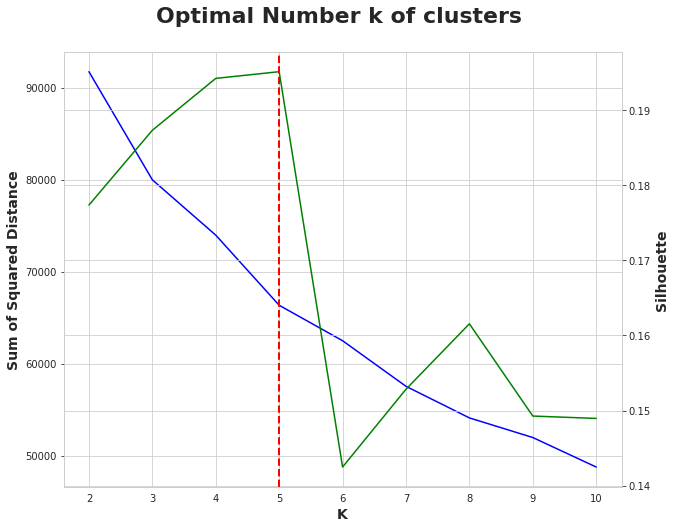

In [106]:
# Plotting the elbow curve
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(cluster, WCSS, color='blue')
ax.set_xlabel('K', fontsize=14, fontweight='bold')
ax.set_ylabel('Sum of Squared Distance', fontsize=14, fontweight='bold')

# Plotting the silhouette curve
ax2=ax.twinx()
ax2.plot(cluster, Silhouette_scores, color='green')
ax2.set_ylabel('Silhouette', fontsize=14, fontweight='bold')

plt.title('Optimal Number k of clusters \n', fontsize=22, fontweight='bold')
plt.axvline(cluster[np.argmax(Silhouette_scores)], color='red', linestyle='dashed', linewidth=2);

The plot provides a great view of the optimal number of clusters. The elbow curve does not show a clear value for the optimal number of clusters, but with the help of the silhouette score curve it is possible to see that the optimal number of clusters is n_clusters=5.

Unsupervised learning is an important concept in machine learning. It saves data analysts’ time by providing algorithms that enhance the grouping and investigation of data (Mbaabu, 2020). Clustering is the unsupervised machine learning method that identifies and groups similar data points as it classifies data into structures that are easier to understand and manipulate.

## Difference between K-Means and K-Medoids

The K-Medoids algorithm is a clustering algorithm related to the K-Means algorithm and the medoidshift algorithm. Both the K-Means and K-Medoids algorithms are partitional (breaking the dataset up into groups). K-Means attempts to minimize the total squared error, while K-Medoids minimizes the sum of dissimilarities between points labeled to be in a cluster and a point designated as the center of that cluster. In contrast to the K-Means algorithm, K-Medoids chooses datapoints as centers (medoids).

Both methods were applied on the treated dataset. To test each method, the treated data was split into train and test sets and a Random Forest Classification Model was applied to check how well each method fit the dataframe.

## K-Means Clustering

In [107]:
# Applying clustering using K-Means with n_clusters=5
kmeans = KMeans(n_clusters=cluster[np.argmax(Silhouette_scores)], random_state=123)
clusters_kmeans = kmeans.fit_predict(cluster_df_pca)

In [108]:
for i in range(cluster[np.argmax(Silhouette_scores)]):
    print(f"cluster {i + 1} contains: {round((np.sum(clusters_kmeans == i)/len(clusters_kmeans))*100)}% of customers")

cluster 1 contains: 14% of customers
cluster 2 contains: 38% of customers
cluster 3 contains: 45% of customers
cluster 4 contains: 1% of customers
cluster 5 contains: 1% of customers


### Prediction and Evaluation

In [109]:
# Getting X and y to perform prediction
X = cluster_df_pca
y = clusters_kmeans

In [110]:
# Splitting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [111]:
# Model prediction
model = RandomForestClassifier(random_state=123)

# Prediction for KMeans
kmeans_pred = model.fit(X_train, y_train).predict(X_test)
kmeans_score = model.score(X_test, y_test)

print(f'K-Means prediction accuracy: {kmeans_score*100}%')

K-Means prediction accuracy: 98.50238257317903%


## K-Medoids Clustering

In [112]:
# Applying clustering using K-Medoids with n_clusters=5
kmedoid = KMedoids(n_clusters=cluster[np.argmax(Silhouette_scores)], random_state=123)
clusters_kmedoids = kmedoid.fit_predict(cluster_df_pca)

In [113]:
for i in range(cluster[np.argmax(Silhouette_scores)]):
    print(f"cluster {i + 1} contains: {round((np.sum(clusters_kmedoids == i)/len(clusters_kmedoids))*100,)}% of customers")

cluster 1 contains: 23% of customers
cluster 2 contains: 20% of customers
cluster 3 contains: 17% of customers
cluster 4 contains: 14% of customers
cluster 5 contains: 26% of customers


### Prediction and Evaluation

In [114]:
# Getting X and y to perform prediction
X = cluster_df_pca
y = clusters_kmedoids

In [115]:
# Splitting dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [116]:
# Prediction for KMeans
kmedoids_pred = model.fit(X_train, y_train).predict(X_test)
kmedoids_score = model.score(X_test, y_test)

print(f'K-Medoids prediction accuracy: {kmedoids_score*100}%')

K-Medoids prediction accuracy: 93.46494213750852%


## Comparing K-Means and K-Medoids

After performing both methods, the results were a bit different. For K-Means, the majority of customers is concentrated on the first three clusters, while for K-Medoids all 5 clusters hold approximated percentage of clients.

Another conclusion drawn from applying the models is the accuracy got while predicting the clusters. K-Means prediction model scored 98.5% while K-Medoids scored 93.5%, meaning that K-Means performed slightly better than K-Medoids.

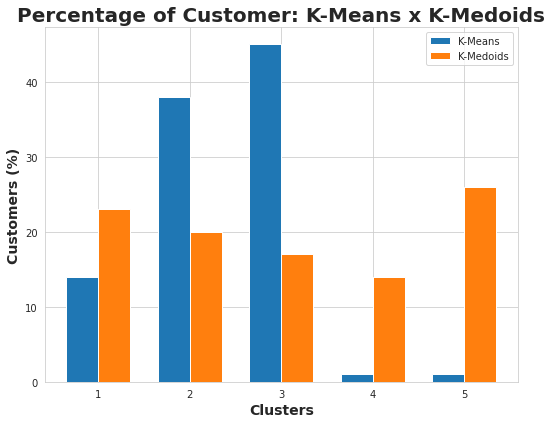

In [117]:
# Visualising percentage of customers in each cluster, comparing K-Means and K-Medoids clusters

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']
kmeans_customers = []
kmedoids_customers = []

for i in range(cluster[np.argmax(Silhouette_scores)]):
    kmedoids_customers.append(round((np.sum(clusters_kmedoids == i)/len(clusters_kmedoids))*100))
    kmeans_customers.append(round((np.sum(clusters_kmeans == i)/len(clusters_kmeans))*100))

x = np.arange(len(labels))+1  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, kmeans_customers, width, label='K-Means')
rects2 = ax.bar(x + width/2, kmedoids_customers, width, label='K-Medoids')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Customers (%)', fontsize=14, fontweight='bold')
ax.set_xlabel('Clusters', fontsize=14, fontweight='bold')
ax.set_title('Percentage of Customer: K-Means x K-Medoids', fontsize=20, fontweight='bold')
ax.set_xticks(x)
ax.legend()

#ax.bar_label(rects1, padding=3, fontsize=12)
#ax.bar_label(rects2, padding=3, fontsize=12)

fig.tight_layout();

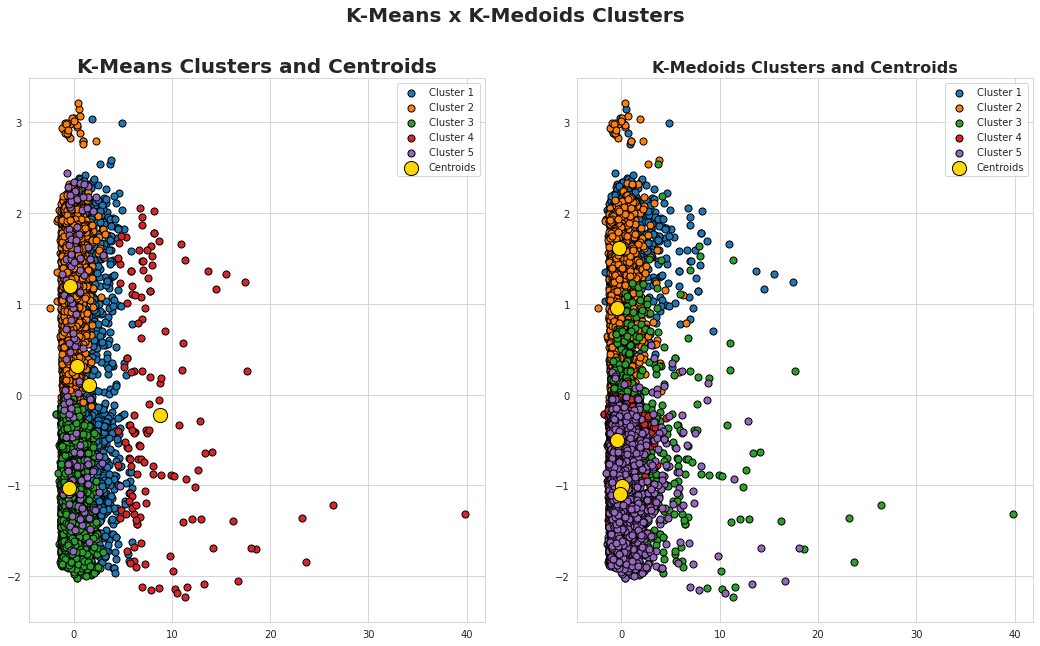

In [118]:
# Plotting scatter plots for both of clustering methods
fig, ax = plt.subplots(1,2,figsize=(18, 10))
plt.suptitle('K-Means x K-Medoids Clusters\n', fontsize=20, fontweight='bold')

# K-Means Clusters
for i in range(cluster[np.argmax(Silhouette_scores)]):
    ax[0].scatter(cluster_df_pca[clusters_kmeans == i, 0], cluster_df_pca[clusters_kmeans == i, 1], s = 50,
            edgecolor = 'k', label = 'Cluster '+ str(i+1))

ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'gold',
            edgecolor = 'k', label = 'Centroids')
ax[0].legend(loc ="best")
ax[0].set_title('K-Means Clusters and Centroids', fontsize=20, fontweight='bold')

# K-Medoids Clusters
for i in range(cluster[np.argmax(Silhouette_scores)]):
    ax[1].scatter(cluster_df_pca[clusters_kmedoids == i, 0], cluster_df_pca[clusters_kmedoids == i, 1], s = 50,
                cmap = 'rainbow', edgecolor = 'k', label = 'Cluster '+ str(i+1))

ax[1].scatter(kmedoid.cluster_centers_[:, 0], kmedoid.cluster_centers_[:,1], s = 200, c = 'gold',
            edgecolor = 'k', label = 'Centroids')
ax[1].legend(loc ="best")
ax[1].set_title('K-Medoids Clusters and Centroids', fontsize=16, fontweight='bold');

The plot above shows that both methods show different clusters, which makes sense with the bar plot. Another difference spotted is the position of the centroids.

# Times Series

Time-series data is a collection of numerical measurements of the same entity taken at equally spaced intervals over time, for example: yearly, monthly, weekly, etc. Therefore, in Machine Learning, time series analysis contemplates deciphering, analysing and organising data by a sequence of time, and consequently making predictions based on the behaviour of the data over time. The behaviour aspects of time series are compound by:
Trend: an overall long-term direction of the data;
Seasonality: a repeated behaviour in the data which occurs at regular intervals;
Cycle: a series follows an up-and-down pattern that is not seasonal;
Variation: a random fluctuation that does not fit in a fixed frequency; 
Irregularities: suddenly dips or jumps in the data, mostly related to a one-off event, e.g: Covid19.

### Preparing Data

In [119]:
# creating a subset with targeted features to apply the model
df_sales = df[['order_purchase_timestamp', 'price']]

# setting index
df_sales.set_index('order_purchase_timestamp', inplace = True)

# ordering data in chronological order
df_sales.sort_values(by=['order_purchase_timestamp'], inplace=True, ascending=True)

# displaying data
df_sales

price
order_purchase_timestamp        
2016-09-04 21:15:19        39.99
2016-09-05 00:15:34        59.50
2016-10-02 22:07:52       100.00
2016-10-03 09:44:50        29.90
2016-10-03 16:56:50        21.90
...                          ...
2018-08-29 14:18:23       209.00
2018-08-29 14:18:28        45.90
2018-08-29 14:52:00        24.90
2018-08-29 15:00:37        84.99
2018-09-03 09:06:57       145.00

[97916 rows x 1 columns]

To implement Time Series, from the main dataset was created a time-series subset named “df_sales” selecting date orders “order_purchase_timestamp” and price of products “price” features to apply a time series analysis, then implement an appropriate time series machine learning model.

In [120]:
# preparing subset frequency
df_sales =  pd.DataFrame(df_sales['price'].resample('D').mean())

# interpolating values, it ignores the index and treats the values as equally spaced
df_sales = df_sales.interpolate(method='linear').round(2)

# displaying data
df_sales

price
order_purchase_timestamp        
2016-09-04                 39.99
2016-09-05                 59.50
2016-09-06                 61.00
2016-09-07                 62.50
2016-09-08                 64.00
...                          ...
2018-08-30                 99.61
2018-08-31                110.95
2018-09-01                122.30
2018-09-02                133.65
2018-09-03                145.00

[730 rows x 1 columns]

The subset was set in a daily frequency, next the values were interpolated, in other words, it ignores the index and treats the values as equally spaced. The period range of the dataset is from 04/09/2016 to 03/09/2018. 

### Exploring Data

In [121]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2016-09-04 to 2018-09-03
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


The subset contains 730 values of numerical type and there are no missing values.

In [122]:
df_sales.describe().round(2)

price
count  730.00
mean   116.07
std     37.44
min     10.90
25%    104.19
50%    118.83
75%    133.71
max    281.09

In [123]:
# loading required library
import plotly.express as px

# plotting the distribuition of the data
fig = px.histogram(df_sales, x=df_sales['price'], nbins=100, title='Distribution of the Price from 2016 to 2018', width=1200, height=600, 
                   opacity=0.7, color_discrete_sequence=['lightseagreen'],
                   log_y=True) # represent bars with log scale

# setting title and labels
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='Price',
    yaxis_title='Count',
    font=dict(
        family='Courier New, monospace',
        size=16,
        color='Black'
    )
)

# displaying plot
fig.show()

From the Histogram chart, it is perceived that the highest amount of data points are concentrated between 100 BRL and 150 BRL prices. Besides, there is an evident volume of price from 10BLR to 15BLR, which may indicate that there was a perceptible frequency of price, however, as most data points are centered between 100-150 BRL range,  they will probably be recognised as outliers, including the range price between 200 BRL to 280 BRL.

In [124]:
# loading required library
import plotly.express as px

# plotting a box plot to check outliers
fig = px.box(df_sales, y='price', notched=True, title="Box Plot of Total Price",
             width=600, height=700, color_discrete_sequence=['lightseagreen'])

# setting title and labels
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title='Price',
    font=dict(
        family='Courier New, monospace',
        size=16,
        color='Black'
    )
)

# displaying plot
fig.show()

From the Box chart, it is confirmed that prices equal and lower than 50BLR and equal and higher than 200 BRL are detected as outliers. Nonetheless, those data points might be considered as one of the time series aspects mentioned previously: irregularities.

In [125]:
# loading required library
import plotly.express as px

# plottting correlation between features
fig = px.scatter(df_sales, x=df_sales.index, y='price', title='Scatter Plot - Date and Price Features',
             width=1200, height=700, color_discrete_sequence=['lightseagreen'],
             size='price', trendline='ols')

# setting title and labels
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title='Period',
    yaxis_title='Price',
    font=dict(
        family='Courier New, monospace',
        size=16,
        color='Black'
    )
)

# displaying plot
fig.show()

From the Scatter chart, as the data points did not present any significant pattern of up-and-down it was presumed that date and price features are weakly correlated. Also, the trend line poorly increased drawn over time, meaning a weakly positive correlation between the features. Besides, as in previous charts, it is seen that the data points are most concentrated on 100 BRL and 150 BLR prices and a small quantity of the price than 200BLR are represented by bigger bubbles in the chart, meaning that the frequency of higher prices is minor. Further, about the irregularity observed before, it is clear from the chart there was an unusual event in the last months of 2016 when there was a significant prevalence of the prices range between 10 BLR and 15 BLR.

In [126]:
# importing required library
import plotly.express as px

# plotting the price distribution over time
fig = px.line(df_sales, x=df_sales.index, y='price', title='Prices Timeline', 
              width=1200, height=700, color_discrete_sequence=['lightseagreen'])

# setting title, labels and ticks
fig.update_layout(
    title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    #title='Prices from 2016 to 2018',
    xaxis_title='Period',
    yaxis_title='Price',
    font=dict(
        family='Courier New, monospace',
        size=16,
        color='Black'
    )
)

# setting period to visualise
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='YTD', step='year', stepmode='todate'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

# displaying plot
fig.show()

From the Line chart, it illustrates the same irregularity behaviour as mentioned in the previous chart, but here it is seen more clearly that there was a gradual dip in the final quarter of 2016 and then a sharp increase in the first month of 2017. There were a few similar peaks until August, however, after that, the data present a major pattern of range price between 100 BRL and 150 BLR.

Further, it is relevant to highlight the irregularity detected in the dataset, it was supposed that it might be related to a political crisis in Brazil that occurred at that exact time. According to Silvio Cascione (Reuters, 2017), on August 31, 2016, there was an intense impeachment of the first woman president, Dilma Rousseff, and consequently a deep economic recession in the months subsequent.

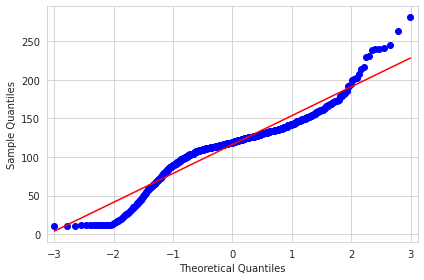

In [127]:
# loading required library
import statsmodels.api as sm

# Q-Q plot of the quantiles of X versus the quantiles/ppf of a distribution
x = sm.qqplot(df_sales['price'], line = 's')

# displaying plot
plt.tight_layout()
plt.show()

**Note:** From the QQ chart, it is realised that the data points did not fit on the normal distribution line (red colour). Price values are represented by the blue line, so the range price between 100 BRL and 150 BLR fluctuated closer to the line red, and the range prices lower than 50BRL and higher than 200 BRL are further from the red line (considered outliers before).

### The Augmented Dickey–Fuller Test (ADF)

The statistical method ADF is a unit root test for stationarity over time, in other words, null hypotheses to detect if a dataset is stationary or non-stationarity, thus if the test statistic is greater than critical values it fails to reject the null hypothesis, so it is non-stationarity data, otherwise if the test statistic is less than critical values it rejects the null hypothesis, meaning that it is stationary data. Likewise, for considering stationary data, the p-value must be lower than 0.05 to reject the null hypothesis.

In [128]:
# comparing mean and variance over time - splitting the data into train, test and validate
train, test, validate = np.split(df_sales['price'].sample(frac=1), [int(.6*len(df_sales['price'])),int(.8*len(df_sales['price']))])

In [129]:
# displaying train, test and validate data
print('Train Dataset:')
print(train)
print('\nTest Dataset:')
print(test)
print('\nValidate Dataset:')
print(validate)

Train Dataset:
order_purchase_timestamp
2016-09-12     70.00
2018-04-12    126.04
2017-01-17     98.36
2018-06-02    168.78
2018-08-01    121.47
               ...  
2017-06-02    148.88
2017-04-23    113.10
2017-03-18    216.18
2017-09-07    166.73
2018-07-30    130.03
Name: price, Length: 438, dtype: float64

Test Dataset:
order_purchase_timestamp
2018-04-17    126.88
2016-11-27     40.23
2017-12-21    126.17
2017-03-06     97.44
2017-02-19     90.30
               ...  
2016-09-07     62.50
2016-11-12     57.16
2017-03-07    134.19
2017-12-08    130.80
2018-02-20    121.82
Name: price, Length: 146, dtype: float64

Validate Dataset:
order_purchase_timestamp
2016-11-20     48.13
2017-01-22    112.02
2017-10-01    136.19
2017-11-07    116.30
2017-11-30    110.60
               ...  
2018-02-15    107.88
2018-05-21     97.91
2017-04-16    105.90
2017-05-07    153.44
2018-04-26    110.96
Name: price, Length: 146, dtype: float64


The dataset was split into the train, test and validate sets to calculate the mean and variance.

In [130]:
# calculating the mean of train, test and validate data
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean()

# alculating the variance of train, test and validate data
variance1, variance2, variance3 = train.var(), test.var(), validate.var()

# displaying mean and variance results
print('Mean1 = %f\nMean2 = %f\nMean3 = %f\n' % (mean1, mean2, mean3))
print('Variance1 = %f\nVariance2 = %f\nVariance3 = %f' % (variance1, variance2, variance3))

Mean1 = 118.014155
Mean2 = 111.872123
Mean3 = 114.439247

Variance1 = 1444.382771
Variance2 = 1312.625940
Variance3 = 1348.285574


By looking at the mean and variance results, there is no significant variation between them, meaning that the dataset has no trends, so it might be stationary data

In [131]:
# calculating Dickey-Fuller Test
adf_results = adfuller(df_sales.price.tolist())

# displaying adf results, number of lags, p-value and critical values
print('\nAdf_Price Results = ', adf_results)
print('\nAdf_Price = ', str(adf_results[0]))
print('\np-value = ', str(adf_results[1]))
print('\nLags Number: ', adf_results[2])
print('\nCritical Values:\n')

# loop to display p-value 1%, 5% and 10%
for key, val in adf_results[4].items(): 
    print(key,':',val)    
    if adf_results[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary.\n')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary.\n')


Adf_Price Results =  (-3.010351810927732, 0.03393891523665434, 20, 709, {'1%': -3.439606888036868, '5%': -2.865625121924057, '10%': -2.5689454046801052}, 6613.3518990401735)

Adf_Price =  -3.010351810927732

p-value =  0.03393891523665434

Lags Number:  20

Critical Values:

1% : -3.439606888036868
Null Hypothesis Accepted. Time Series is not Stationary.

5% : -2.865625121924057
Null Hypothesis Rejected. Time Series is Stationary.

10% : -2.5689454046801052
Null Hypothesis Rejected. Time Series is Stationary.



The ADF, p-values and critical values (1%, 5% and 10%) were calculated using the entire dataset. Now, analysing results, it is seen that they appointed positive stationarity for the dataset. First, the ADF is a negative value (-3.01), then the p-value is smaller than 0.05 (0.03). About the critical values, as mentioned before, to affirm the dataset is stationary the critical value should be lower than ADF to reject the null hypothesis, so from the results, the 5% and 10% critical values are smaller than the ADF value, but the critical value of 1% is greater than ADF value - not able to reject the null hypothesis. In this way, it would be treated as non-stationary, however as it is a tiny critical value percentage to measure the entire dataset, it was assumed that this result was more influenced by the irregularity that occurred in the late 2016 year, than other critical values. To make sure of this observation, the rolling mean and standard deviation were plotted compared to original data to check the stationarity of data.

### Rolling Statistics

Rolling Statistics is generally used to analyse the stability of the data, in other words, as the ADF test, the rolling analysis also checks for trends in the data. The calculation of rolling statics builds a rolling window with a particular size which is the point where the calculation starts, then it rolls all down data. In such a manner, it was calculated the rolling mean and standard deviation with a size of the rolling window of 30 (30 first points), an attempt to remove the irregularity in late 2016 year and to prove the observation cited previously.

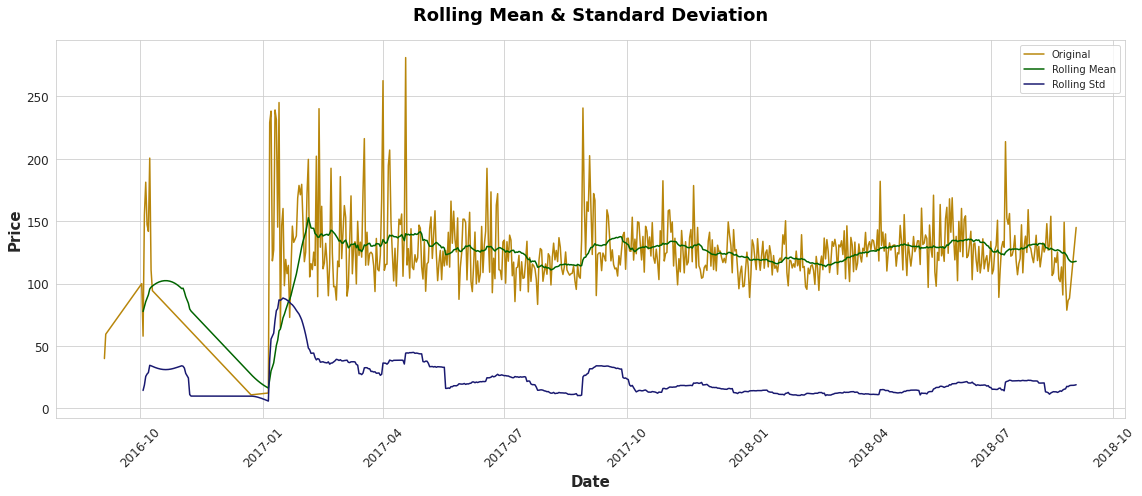

In [132]:
# determing rolling statistics
roll_mean = df_sales.rolling(30).mean()
roll_std = df_sales.rolling(30).std()

# plot size
plt.figure(figsize=(16,7))
fig = plt.figure(1)

# plotting raw data and rolling statistics
orig = plt.plot(df_sales, color='darkgoldenrod',label='Original')
mean = plt.plot(roll_mean, color='darkgreen', label='Rolling Mean')
std = plt.plot(roll_std, color='midnightblue', label = 'Rolling Std')

# setting title, labels and ticks
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation', fontsize=18, color='black', weight='bold', pad=20)
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Price', fontsize=15, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.tight_layout()
plt.show(block=False)

From the Rolling Statistics chart above, it is noticed that both lines of rolling mean and standard deviation (lines green and blue colours respectively) did not evidence significant ups and downs over time, affirming that there is no notable variation in the price values over time, affirming that the dataset is stationary.

After detecting that the data set is already stationary, it was presumed that the ARIMA model could not be more adequate for this dataset, as the ARIMA model normally integrates the difference value when converting a non-stationary to a stationary dataset. Then, another option specified in the CA is to apply the Exponential Smoothing Model. Thus, before it, the dataset was decomposed to study its trend and seasonality.

### Decomposing Data 

Decomposing Time Series Data is a technique normally used for analysing historical time series data and forecasting. This technique breaks down the data into systematic components and non-systematic components. Systematic compounds for times series components can be described or modelled, such as level, trend and seasonality; oppositely for non-systematic compounds with components that cannot be modelled, residual. The level could be defined as a general movement of the data over time or average values over time. As cited before, the trend is an overall long-term direction of the data and seasonality refers to a repeated behaviour in the data which occurs at regular intervals or short-term cycles, and finally, the residual or noise is data not captured by trend or seasonality or random variation of the data.

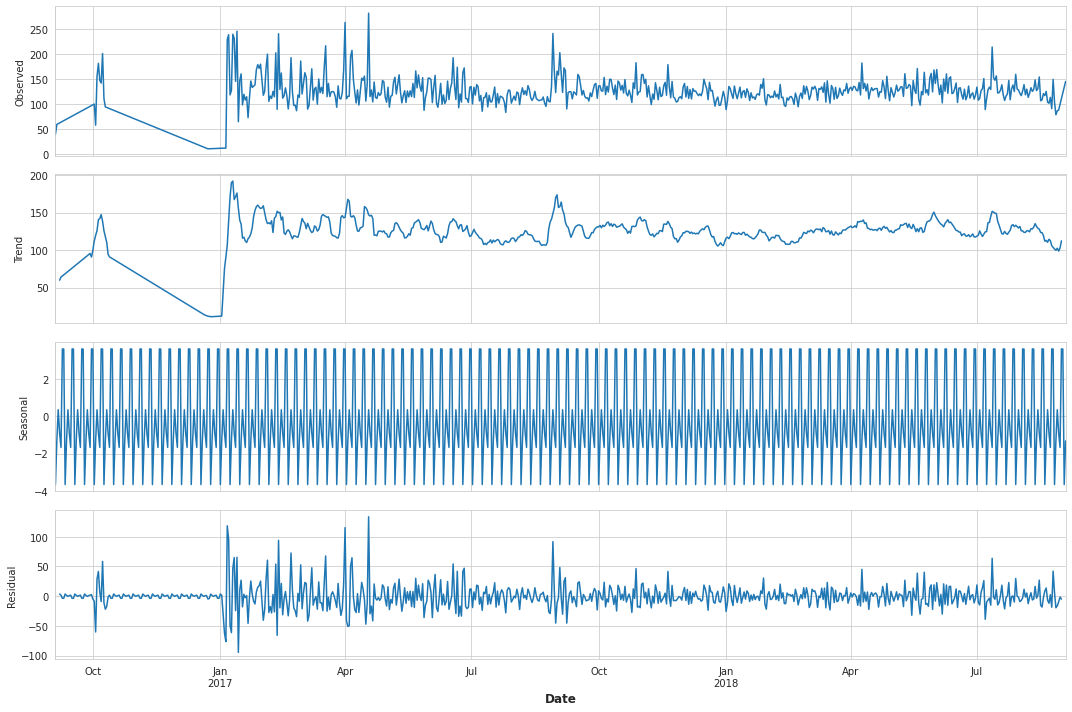

In [133]:
# plot size
rcParams['figure.figsize'] = 15, 10

# decomposing time series data
decomposition = sm.tsa.seasonal_decompose(df_sales['price'], model='additive')

# setting plot
fig = decomposition.plot()
plt.xlabel('Date', fontsize=12, weight='bold')

# displaying plot
plt.tight_layout()
plt.show()

From the Decomposing plot it is seen the data is not increasing or decreasing, so the trend is unclear, and it is not presenting any short-term cycles, meaning that there is no seasonality.

After this observation, it was assumed that the only model adequate for this dataset is Simple Exponential Smoothing, however as the trend is unclear it was decided to test the Double Exponential Smoothing to check its performance; while the Triple Exponential Smoothing will not be applied as it requires seasonality.

### ACF and PACF Functions

In [134]:
# setting a plot for ACF and PACF functions
def plotds(xt, nlag = 500, fig_size = (17, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series', fontsize=20, color='black', weight='bold', pad=20)
    plot_acf(xt, lags = 50, ax = ax_acf)
    plot_pacf(xt, lags = 50, ax = ax_pacf)
    plt.tight_layout()
    return None

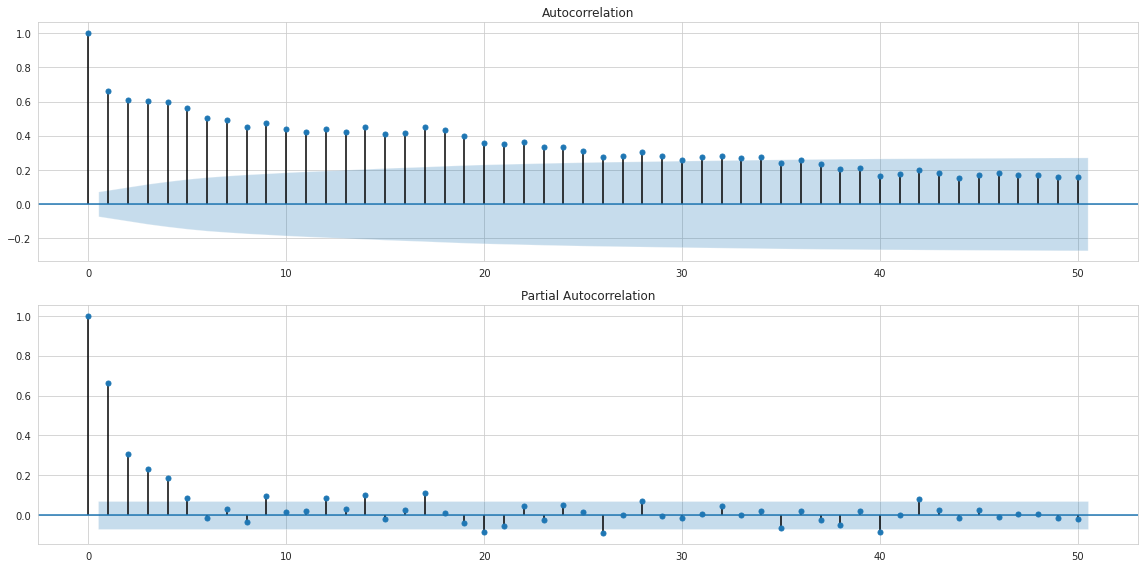

In [135]:
# plot size
fig = plt.figure(figsize=(16, 8))

# plotting ACF of the data
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_sales,lags=50,ax=ax1)

# plotting PCF of the data
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_sales,lags=50,ax=ax2)

# displaying plot
plt.tight_layout()
plt.show()

It is seen that the autocorrelation shows significant serial correlation and the PACF shows a slight sine wave pattern, meaning that it would have set up a moving average "q" parameter in the ARIMA model. However, as mentioned earlier the ARIMA will not be applied because the dataset is stationary, so ACF and PACF functions do not correlate with the model that will be applied. These functions were executed and explained as required in the CA.



## Single Exponential Smoothing Model

The Single Exponential Smoothing (SES) forecasts by using a weighted average of all the previous values in a time series. Also, it is assumed that the series does not have trend and seasonality, only includes level and error. The premise of the level is that the level will stay put and not move, therefore the k-step ahead of the SES forecast is simply the most recent estimate of its level at the time.

Thus, we could say that the SES technique builds up a weighted average of the values in the series, and the weight of each value decays exponentially as we move back in time, or averaging in a smoothing way. Besides, it also includes the smoothing constant or alpha which determines how much of the smoothing or how fast the weights of the series decrease, a number between 0 and 1, when it is closer to 1 the past values have less effect on the algorithm, while when it is closer to 0 more all the values in the series will have equal weight in the average.

Overall, the SES technique simply takes a weighted average of all the values in the series and the weight decays exponentially into the past, so the most recent values get higher weight. Further another key concept is to choose how fast the weights will decay or learn from new data by smoothing constant.



### Parameter

In [136]:
# splitting dataset into train and test sets
X = df_sales['price']
trainX = X.iloc[:720]
testX = X.iloc[720:]

# displaying train and test sets shape
trainX.shape, testX.shape

((720,), (10,))

Before actually applying the model, first we looked for the parameter, in this case, the alpha. So, the dataset was split with 10 observations for the testing set as required in the CA, then the rest observations were destined to the training set.

In [137]:
# calculating the mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# calculating MSE, MAE, RMSE, MAPE and R² evaluation metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):      
    print('Evaluation metric results: ')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

After that, a calculation of the evaluation metrics was created.

In [138]:
# a for-loop to search for the best smoothing parameter: Alpha
resu = []
temp_df = pd.DataFrame()
for i in [0, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]:
    # displaying evaluation metric results
    print(f'Fitting for smoothing level = {i}')
    fit_v = SimpleExpSmoothing(np.asarray(trainX)).fit(i)
    fcst_pred_v = fit_v.forecast(len(testX))   
    timeseries_evaluation_metrics_func(testX, fcst_pred_v)

Fitting for smoothing level = 0
Evaluation metric results: 
MSE is : 575.8030583046466
MAE is : 21.399893461487277
RMSE is : 23.99589669724069
MAPE is : 20.60600785698367
R2 is : -0.03288229569905954

Fitting for smoothing level = 0.1
Evaluation metric results: 
MSE is : 588.7650950347276
MAE is : 21.66240291445326
RMSE is : 24.264482171163834
MAPE is : 21.064955149037008
R2 is : -0.056133749580046244

Fitting for smoothing level = 0.2
Evaluation metric results: 
MSE is : 559.3940180154698
MAE is : 20.363999999999997
RMSE is : 23.65151196045339
MAPE is : 18.712223505681123
R2 is : -0.0034475663073720852

Fitting for smoothing level = 0.3
Evaluation metric results: 
MSE is : 591.8890266900344
MAE is : 20.364
RMSE is : 24.32876952683868
MAPE is : 17.953266684049034
R2 is : -0.061737494911376256

Fitting for smoothing level = 0.4
Evaluation metric results: 
MSE is : 637.2900390888229
MAE is : 20.623217764505636
RMSE is : 25.244604157895267
MAPE is : 17.6823782366044
R2 is : -0.14317836473

Further, a for-loop was created to figure out the best parameter was created by looping with all possible numbers of alpha to calculate the best parameter for this data.

In [139]:
# a for-loop to output the RMSE value for each provided 
# smoothing parameter and store the results in a table
resu = []
temp_df = pd.DataFrame()
for i in [0 , 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]:
    
    # applying, fitting and predicting the model to see the best parameter
    fit_v = SimpleExpSmoothing(np.asarray(trainX)).fit(i)
    fcst_pred_v = fit_v.forecast(len(testX))   
    rmse = np.sqrt(metrics.mean_squared_error(testX, fcst_pred_v))
    df3 = {'smoothing parameter':i, 'RMSE': rmse}
    temp_df = temp_df.append(df3, ignore_index=True)

# displaying RMSE with its smoothing parameter
temp_df.sort_values(by=['RMSE'])

RMSE  smoothing parameter
2   23.651512                  0.2
0   23.995897                  0.0
1   24.264482                  0.1
3   24.328770                  0.3
4   25.244604                  0.4
5   26.157639                  0.5
6   27.060239                  0.6
7   27.993596                  0.7
8   29.012897                  0.8
9   30.179617                  0.9
10  31.550805                  1.0

As a result, the best alpha value was 0.2 with the smallest RME value.

### Model

In [140]:
# creating a subset with targeted features to apply the model
df_sales = df[['order_purchase_timestamp', 'price']]

# setting index
df_sales.set_index('order_purchase_timestamp', inplace = True)

# ordering data in chronological order
df_sales.sort_values(by=['order_purchase_timestamp'], inplace=True, ascending=True)

In [141]:
# preparing subset frequency
df_sales =  pd.DataFrame(df_sales['price'].resample('D').mean())

# interpolating values, it ignores the index and treats the values as equally spaced
df_sales = df_sales.interpolate(method='linear').round(2)

In [142]:
# splitting dataset into train and test sets
ses_train = df_sales[:720]
ses_test = df_sales[720:]

# displaying train and test sets shape
ses_train.shape, ses_test.shape

((720, 1), (10, 1))

The dataset was prepared again to apply the model, then the testing set size was split as required in CA.

In [143]:
# building, fitting and optimising SES model
ses_model = SimpleExpSmoothing(df_sales['price']).fit(
    smoothing_level = 0.2, optimized = True, use_brute = True)

# displaying SES summary
ses_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       SimpleExpSmoothing Model Results                       
==============================================================================
Dep. Variable:                  endog   No. Observations:                  730
Model:             SimpleExpSmoothing   SSE                         486411.284
Optimized:                       True   AIC                           4750.289
Trend:                           None   BIC                           4759.475
Seasonal:                        None   AICC                          4750.344
Seasonal Periods:                None   Date:                 Mon, 13 Dec 2021
Box-Cox:                        False   Time:                         11:50:08
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              60.423697                  l.0                 True
------------------------------------------------------------------------------
"""

Then, the model was applied, optimised and tuned with 0.2 as the alpha value. 

### Forecasting

In [144]:
# forescating SES model -> 10 days ahead
ses_forecast = ses_model.forecast(10)

# displaying forecast values
ses_forecast

2018-09-04    118.548289
2018-09-05    118.548289
2018-09-06    118.548289
2018-09-07    118.548289
2018-09-08    118.548289
2018-09-09    118.548289
2018-09-10    118.548289
2018-09-11    118.548289
2018-09-12    118.548289
2018-09-13    118.548289
Freq: D, dtype: float64

Although the CA requires only one step ahead to forecast, it was decided to forecast 10 steps ahead to check the behaviour of predicted values, and it was realised that the forecast is predicting the same value for all 10 days.

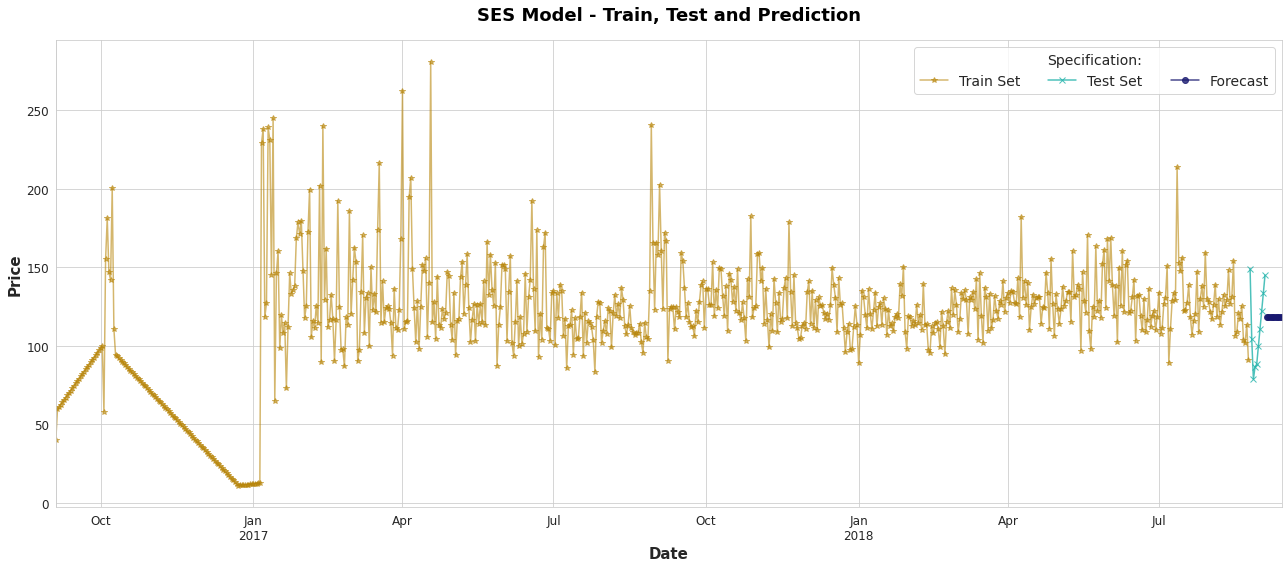

In [145]:
# plotting traning, testing and prediction results
ses_train['price'].plot(color='darkgoldenrod', alpha=0.6, marker = '*', legend = True, label = 'Train Set')
ses_test['price'].plot(color='lightseagreen', alpha=0.8, marker = 'x', legend = True, label = 'Test Set', figsize = (18, 8))
ses_forecast.plot(color='midnightblue', alpha=0.8, marker = 'o', legend = True, label = 'Forecast');

# setting title, legend, labels and ticks
plt.title('SES Model - Train, Test and Prediction', fontsize=18, color='black', weight='bold', pad=20)
plt.legend(title='Specification:', title_fontsize=14, loc='upper right', ncol=3, fontsize=14)
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Price', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.tight_layout()
plt.show()

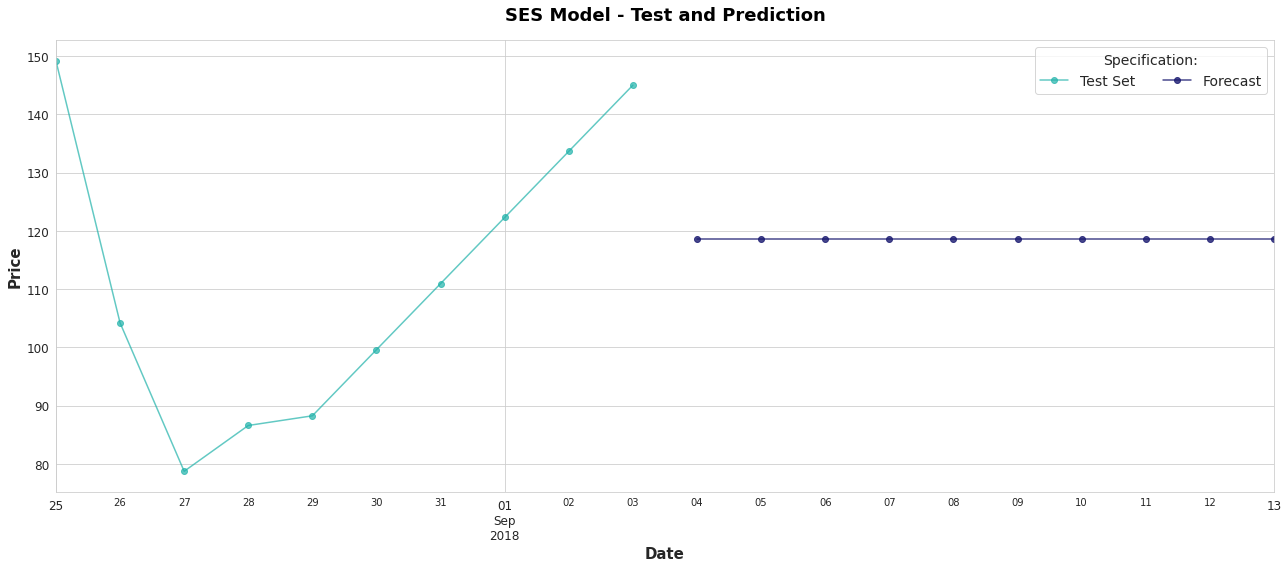

In [146]:
# plotting testing and prediction results
ses_test['price'].plot(color='lightseagreen', alpha=0.7, marker = 'o', legend = True, label = 'Test Set', figsize = (18, 8))
ses_forecast.plot(color='midnightblue', alpha=0.8, marker = 'o', legend = True, label = 'Forecast');

# setting title, legend, labels and ticks
plt.title('SES Model - Test and Prediction', fontsize=18, color='black', weight='bold', pad=20)
plt.legend(title='Specification:', title_fontsize=14, loc='upper right', ncol=3, fontsize=14)
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Price', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.tight_layout()
plt.show()

From the chart above it is seen that the line of predicted values (blue colour) is constant, representing the same value. 

### Evaluation

In [147]:
# displaying evaluation metric results
print('Evaluation metric results:')
print(f'MSE: {mean_squared_error(ses_test, ses_forecast)}')
print(f'MAE: {mean_absolute_error(ses_test, ses_forecast)}')
print(f'RMSE: {np.sqrt(mean_squared_error(ses_test, ses_forecast))}')
print(f'MAPE: {mean_absolute_percentage_error(ses_test, ses_forecast)}')
print(f'r2: {r2_score(ses_test, ses_forecast)}', end='\n')

Evaluation metric results:
MSE: 602.3659727190059
MAE: 21.88365786022852
RMSE: 24.543145126878215
MAPE: 21.451776869434738
r2: -0.0805311638755204


Even though the RME kept a small value of 24.54 after the model application, the R2 presented is only -8%, confirming that the model performed unsuccessfully.

### Residuals

As cited before, residual is the leftover of the model that could not be captured.

In [148]:
# calling residual values
ses_residuals = DataFrame(ses_model.resid)
ses_residuals

0
order_purchase_timestamp           
2016-09-04               -20.433697
2016-09-05                 3.163042
2016-09-06                 4.030434
2016-09-07                 4.724347
2016-09-08                 5.279478
...                             ...
2018-08-30                -1.063090
2018-08-31                10.489528
2018-09-01                19.741622
2018-09-02                27.143298
2018-09-03                33.064638

[730 rows x 1 columns]

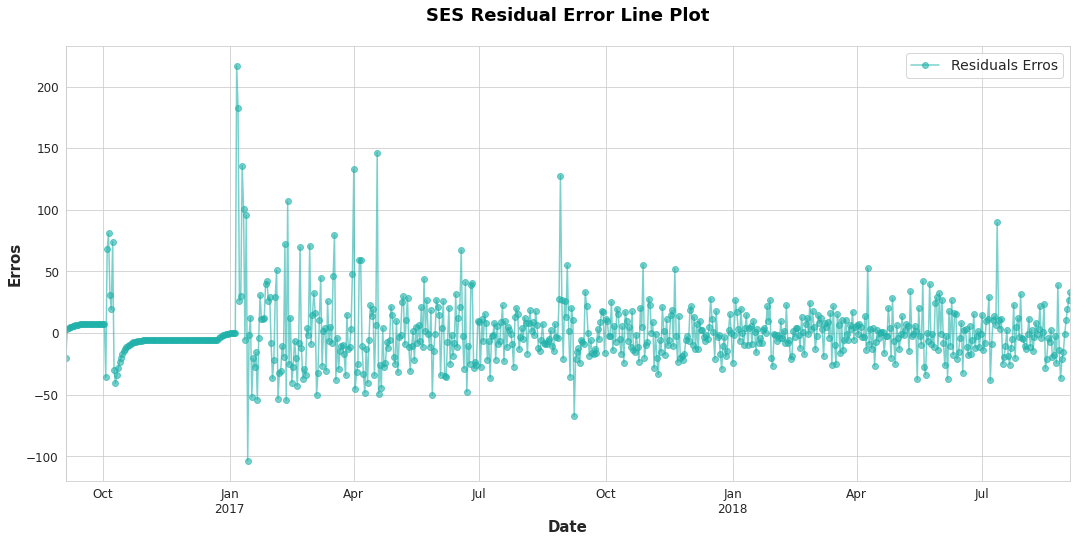

In [149]:
# line plot of residuals
ses_residuals.plot(color='lightseagreen', alpha=0.6, marker='o', figsize = (18, 8))

# setting title, legend, labels and ticks
plt.legend(['Residuals Erros'], loc='upper right', ncol=1, fontsize=14)
plt.title('SES Residual Error Line Plot', fontsize=18, color='black', pad=25, weight='bold')
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Erros', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# diplaying plot
pyplot.show()

From the line plot of the residual errors, suggesting that there may still be nuances in the data not captured by the model.

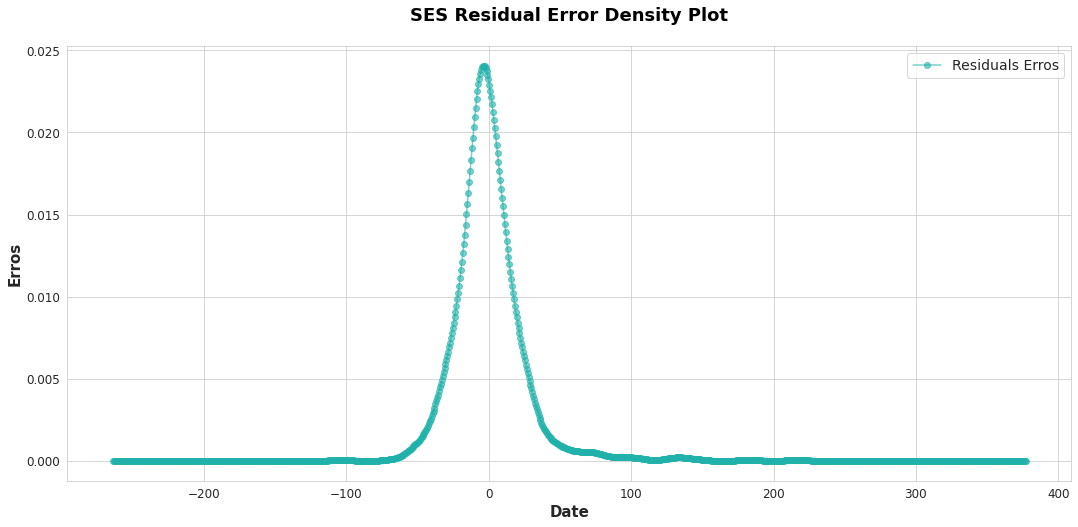

In [150]:
# density plot of residuals
ses_residuals.plot(kind='kde', color='lightseagreen', marker='o', alpha=0.6, figsize = (18, 8))

# setting title, legend, labels and ticks
plt.legend(['Residuals Erros'], loc='upper right', ncol=1, fontsize=14)
plt.title('SES Residual Error Density Plot', fontsize=18, color='black', pad=25, weight='bold')
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Erros', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# diplaying plot
pyplot.show()

From the distribution of the residual errors it is displayed that there is a bias in the prediction or a non-zero mean in the residuals.

In [151]:
# summary stats of residuals
print(ses_residuals.describe())

                0
count  730.000000
mean     0.398114
std     25.827740
min   -103.850031
25%    -11.494623
50%     -2.928920
75%      8.541248
max    216.886331


It is observed that although it was used the entire dataset, it would ideally be performed only on the training dataset when developing a predictive model.

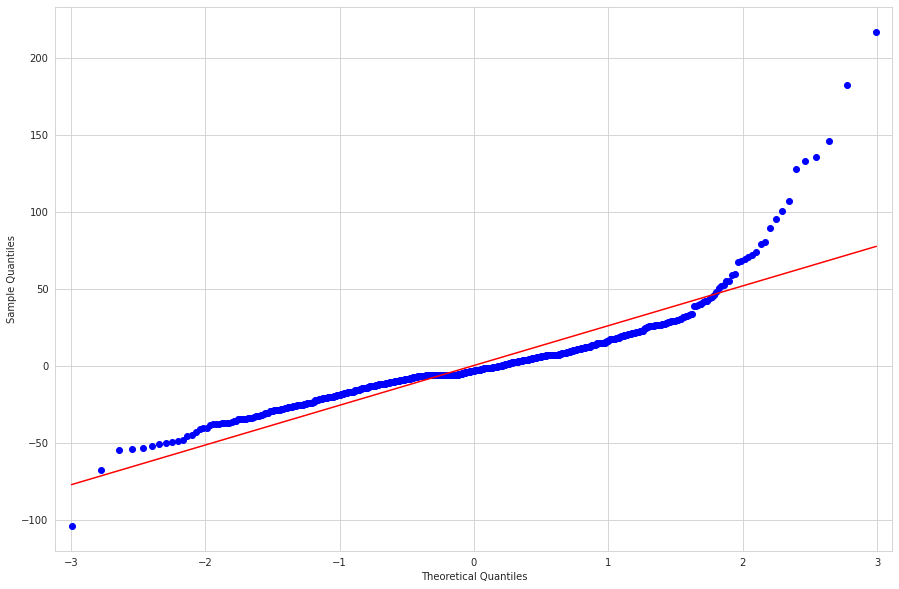

In [152]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution for ARIMA model
x = sm.qqplot(ses_model.resid, line = 's')

# displaying plot
plt.show()

## Double Exponential Smoothing

According to Statistics How To (Statistics How To, 2021) while Single Exponential Smoothing uses a weighted moving average with exponentially decreasing weights, Double Exponential Smoothing (DES) is usually more reliable for handling data that shows trends, compared to the single procedure.
In such a manner, as the trend was unclear, it was decided to implement the DES model to analyse model performance and data behaviour.


### Parameters

In [153]:
# creating a subset with targeted features to apply the model
df_sales = df[['order_purchase_timestamp', 'price']]

# setting index
df_sales.set_index('order_purchase_timestamp', inplace = True)

# ordering data in chronological order
df_sales.sort_values(by=['order_purchase_timestamp'], inplace=True, ascending=True)

In [154]:
# preparing subset frequency
df_sales =  pd.DataFrame(df_sales['price'].resample('D').mean())

# interpolating values, it ignores the index and treats the values as equally spaced
df_sales = df_sales.interpolate(method='linear').round(2)

In [155]:
# splitting dataset into train and test sets
X = df_sales['price']
trainX = X.iloc[:720]
testX = X.iloc[720:]

# displaying train and test sets shape
trainX.shape, testX.shape

((720,), (10,))

The data to implement this model was the same as selected for the SES model and the testing set size was split as required in CA, only the last 10 observations, so the rest of the data was allocated to the training set.

In [156]:
# a grid to search for the best parameters
param_grid_DES = {'smoothing_level': [0.10,0.20,.30,.40,.50,.60,.70,.80,.90], 
                  'smoothing_slope':[0.10,0.20,.30,.40,.50,.60,.70,.80,.90],
                  'damping_slope': [0.10,0.20,.30,.40,.50,.60,.70,.80,.90],
                  'damped': [True, False]}
pg_DES = list(ParameterGrid(param_grid_DES))

# displaying parameters
pg_DES

[{'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.1},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.2},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.3},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.4},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.5},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.6},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.7},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.8},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.1,
  'smoothing_slope': 0.9},
 {'damped': True,
  'damping_slope': 0.1,
  'smoothing_level': 0.2,
  'smoothing_slope': 0.1},
 {'damped': True,
  'damping_slope': 0.1,
  'smoot

Next, a grid was created with all possibilities of parameters value for the model: smoothing level, smoothing slope, damping slope and damped. Then, the model was applied, fit and predicted to check the best parameters.

In [157]:
df_results_DES = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope', 'damped', 'RMSE','R²'])

# a for-loop to output the RMSE and R2 values for each provided 
# parameters and store the results in a table
for a,b in enumerate(pg_DES):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    
    # applying, fitting and predicting the model to see the best parameters
    fit_Holt = Holt(trainX, damped=damped).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope=damping_slope, optimized=False)
    fcst_gs_pred_Holt = fit_Holt.forecast(len(testX))
    df_pred = pd.DataFrame(fcst_gs_pred_Holt, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(testX, df_pred.Forecasted_result))
    r2 = metrics.r2_score(testX, df_pred.Forecasted_result)
    df_results_DES = df_results_DES.append({'smoothing_level':smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope':damping_slope, 'damped':damped, 'RMSE':RMSE, 'R²':r2}, ignore_index=True)

# displaying RMSE and R2 with their smoothing parameter
df_results_DES.sort_values(by=['RMSE','R²']).head(10)

smoothing_level  smoothing_slope  ...       RMSE        R²
331              0.1              0.8  ...  23.498928  0.009458
330              0.1              0.7  ...  23.504764  0.008966
332              0.1              0.9  ...  23.511650  0.008385
409              0.1              0.5  ...  23.521317  0.007569
329              0.1              0.6  ...  23.531294  0.006727
251              0.1              0.9  ...  23.538664  0.006105
410              0.1              0.6  ...  23.540389  0.005959
408              0.1              0.4  ...  23.548366  0.005286
250              0.1              0.8  ...  23.568857  0.003554
328              0.1              0.5  ...  23.580783  0.002545

[10 rows x 6 columns]

As a result of the parameters grid, the best parameters were 0.1 for smoothing level, 0.8 for smoothing slope, 0.5 for damping slope and True for damped.

### Model

In [158]:
# creating a subset with targeted features to apply the model
df_sales = df[['order_purchase_timestamp', 'price']]

# setting index
df_sales.set_index('order_purchase_timestamp', inplace = True)

# ordering data in chronological order
df_sales.sort_values(by=['order_purchase_timestamp'], inplace=True, ascending=True)

In [159]:
# preparing subset frequency
df_sales =  pd.DataFrame(df_sales['price'].resample('D').mean())

# interpolating values, it ignores the index and treats the values as equally spaced
df_sales = df_sales.interpolate(method='linear').round(2)

In [160]:
# splitting dataset into train and test sets
des_train = df_sales[:720]
des_test = df_sales[720:]

# displaying train and test sets shape
des_train.shape, des_test.shape

((720, 1), (10, 1))

In [161]:
# building, fitting and optimising DES model
des_model = Holt(df_sales['price'], damped=True).fit(
    smoothing_level=0.1, smoothing_slope=0.8, 
    damping_slope=0.5, optimized=True, use_brute=True)

# displaying SES summary
des_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:                  endog   No. Observations:                  730
Model:                           Holt   SSE                         500738.103
Optimized:                       True   AIC                           4777.480
Trend:                       Additive   BIC                           4800.445
Seasonal:                        None   AICC                          4777.635
Seasonal Periods:                None   Date:                 Mon, 13 Dec 2021
Box-Cox:                        False   Time:                         11:50:45
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.1000000                alpha                False
smoothing_slope            0.8000000                 beta                False
initial_level              39.990000                  l.0                 True
initial_slope              9.7550000                  b.0                 True
damping_slope              0.5000000                  phi                False
------------------------------------------------------------------------------
"""

The model was applied, optimised and tuned with all parameters calculated in the previous grid.

### Forecasting

In [162]:
# forescating SES model -> 10 days ahead
des_forecast = des_model.forecast(10)

# displaying forecast values
des_forecast

2018-09-04    115.261867
2018-09-05    116.349940
2018-09-06    116.893976
2018-09-07    117.165994
2018-09-08    117.302003
2018-09-09    117.370007
2018-09-10    117.404010
2018-09-11    117.421011
2018-09-12    117.429511
2018-09-13    117.433762
Freq: D, dtype: float64

Unlike the SES model, which performed repeated values for forecasting, the DES model presented different values with a slight increase of each day ahead. In this way, it was supposed that this model demonstrated better performance because it might have considered the minor nuances that were in the dataset over time.

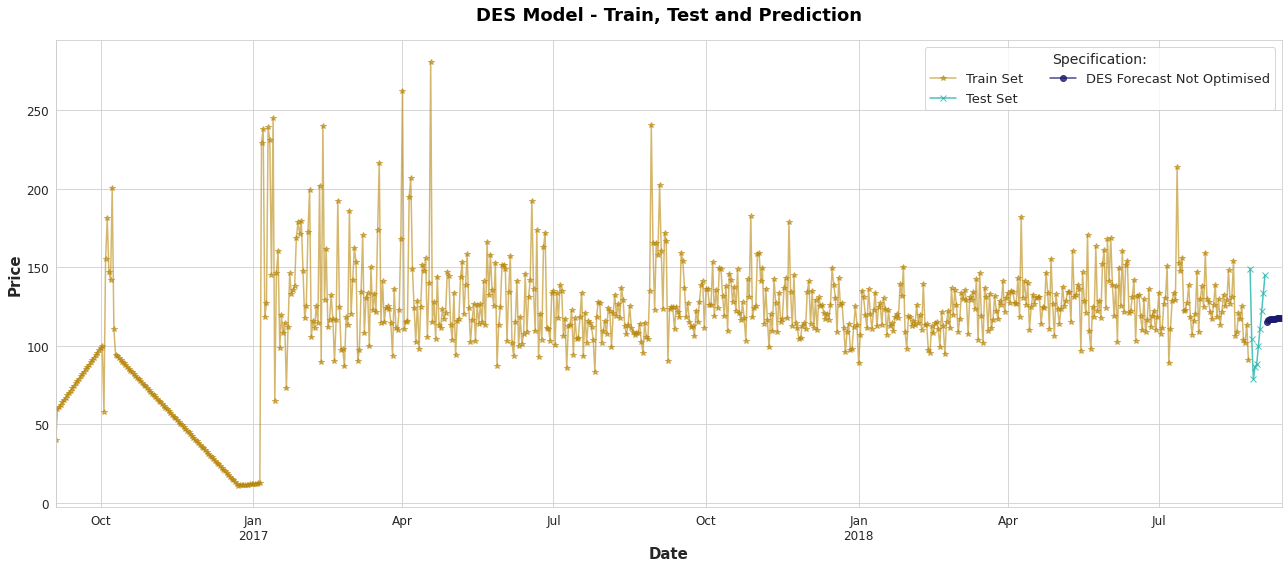

In [163]:
# plotting traning, testing and prediction results
des_train['price'].plot(color='darkgoldenrod', alpha=0.6, marker = '*', legend = True, label = 'Train Set')
des_test['price'].plot(color='lightseagreen', alpha=0.8, marker = 'x', legend = True, label = 'Test Set', figsize = (18, 8))
des_forecast.plot(color='midnightblue', alpha=0.8, marker = 'o', legend = True, label = 'DES Forecast Not Optimised')

# setting title, legend, labels and ticks
plt.title('DES Model - Train, Test and Prediction', fontsize=18, color='black', weight='bold', pad=20)
plt.legend(title='Specification:', title_fontsize=14, loc='upper right', ncol=2, fontsize=13)
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Price', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.tight_layout()
plt.show()

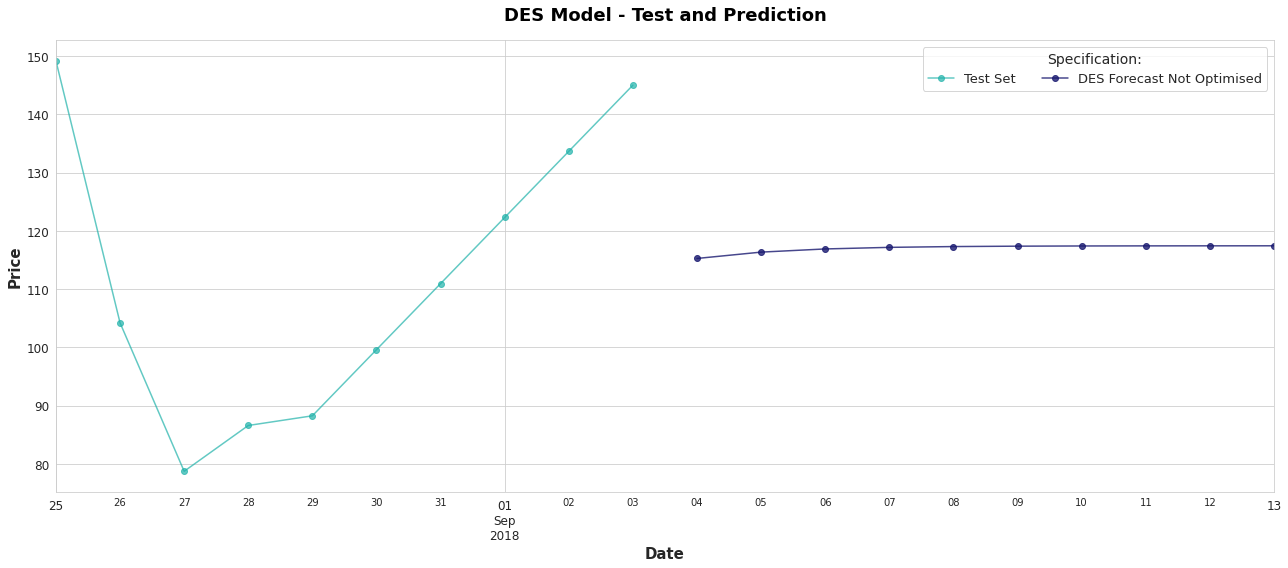

In [164]:
# plotting testing and prediction results
des_test['price'].plot(color='lightseagreen', alpha=0.7, marker = 'o', legend = True, label = 'Test Set', figsize = (18, 8))
des_forecast.plot(color='midnightblue', alpha=0.8, marker = 'o', legend = True, label = 'DES Forecast Not Optimised');

# setting title, legend, labels and ticks
plt.title('DES Model - Test and Prediction', fontsize=18, color='black', weight='bold', pad=20)
plt.legend(title='Specification:', title_fontsize=14, loc='upper right', ncol=3, fontsize=13)
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Price', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# displaying plot
plt.tight_layout()
plt.show()

From the chart above it is seen that the line of predicted values (blue colour) has a slight increase. 

### Evaluation

In [165]:
# displaying evaluation metric results
print('Evaluation metric results:')
print(f'MSE: {mean_squared_error(des_test, des_forecast)}')
print(f'MAE: {mean_absolute_error(des_test, des_forecast)}')
print(f'RMSE: {np.sqrt(mean_squared_error(des_test, des_forecast))}')
print(f'MAPE: {mean_absolute_percentage_error(des_test, des_forecast)}')
print(f'r2: {r2_score(des_test, des_forecast)}', end='\n')

Evaluation metric results:
MSE: 593.3783707906749
MAE: 21.667977817308355
RMSE: 24.359358997943172
MAPE: 20.911521386431467
r2: -0.06440909786931259


Although the RME kept a small value of 24.35 after the model application, the R2 presented is only -6%, affirming that the model performed unsuccessfully.

### Residuals

As cited before, residual is the leftover of the model that could not be captured. 

In [166]:
# calling residual values
des_residuals = DataFrame(des_model.resid)
des_residuals

0
order_purchase_timestamp           
2016-09-04                -9.755000
2016-09-05                 6.243200
2016-09-06                 4.625502
2016-09-07                 4.231243
2016-09-08                 4.423014
...                             ...
2018-08-30                -3.209722
2018-08-31                 9.366198
2018-09-01                19.862405
2018-09-02                28.473081
2018-09-03                35.460308

[730 rows x 1 columns]

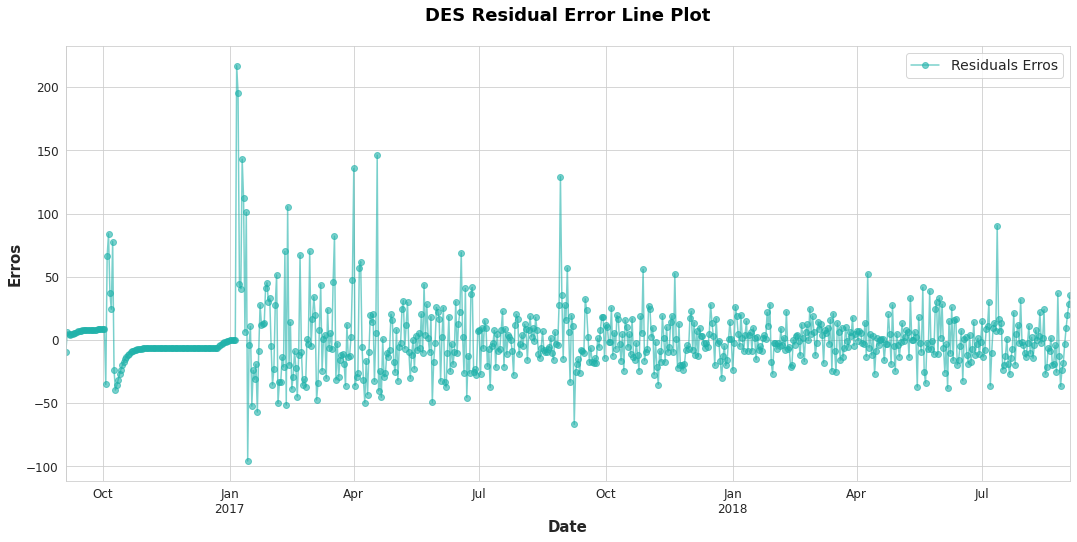

In [167]:
# line plot of residuals
des_residuals.plot(color='lightseagreen', alpha=0.6, marker='o', figsize = (18, 8))

# setting title, legend, labels and ticks
plt.legend(['Residuals Erros'], loc='upper right', ncol=1, fontsize=14)
plt.title('DES Residual Error Line Plot', fontsize=18, color='black', pad=25, weight='bold')
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Erros', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# diplaying plot
pyplot.show()

From the line plot of the residual errors, suggesting that there may still be nuances in the data not captured by the model.

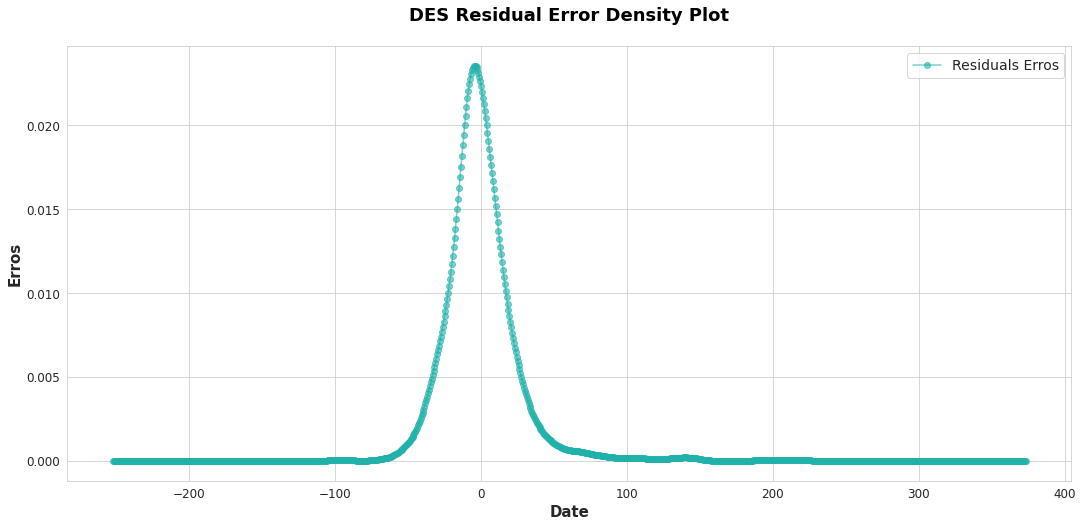

In [168]:
# density plot of residuals
des_residuals.plot(kind='kde', color='lightseagreen', marker='o', alpha=0.6, figsize = (18, 8))

# setting title, legend, labels and ticks
plt.legend(['Residuals Erros'], loc='upper right', ncol=1, fontsize=14)
plt.title('DES Residual Error Density Plot', fontsize=18, color='black', pad=25, weight='bold')
plt.xlabel('Date', fontsize=15, weight='bold')
plt.ylabel('Erros', fontsize=15, weight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# diplaying plot
pyplot.show()

From the distribution of the residual errors it is displayed that there is a bias in the prediction or a non-zero mean in the residuals.

In [169]:
# summary stats of residuals
print(des_residuals.describe())

                0
count  730.000000
mean     0.440929
std     26.204749
min    -95.790542
25%    -11.664037
50%     -3.140946
75%      8.298624
max    216.929711


It is observed that although it was used the entire dataset, it would ideally be performed only on the training dataset when developing a predictive model.

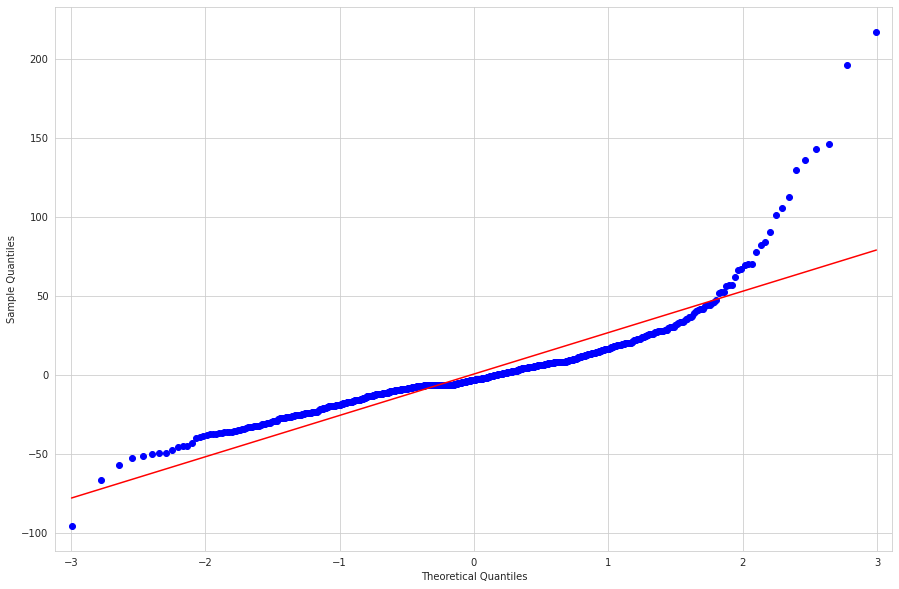

In [170]:
# Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution for ARIMA model
x = sm.qqplot(des_model.resid, line = 's')

# displaying plot
plt.show()

## Conclusion


First, it was validated that the dataset is stationary data, thus assuming the ARIMA Model could be an unsuitable model as it is recommended for non-stationary datasets. Further, it evidenced an unclear indication of trends and no seasonality at all. In such a manner, Single and Double Exponential models were applied, optimised, forecasted and evaluated. Although the Double Exponential performed slightly better than Single Exponential Smoothing, it performed a successful accuracy to predict reliable values.

On one hand, after those considerations, it was presumed the Autoregression Model (AR) might be appropriate to make predictions, as the dataset had shown high autocorrelation in the ACF plot. On the other hand, to achieve predictions along with a greater performance it would also be suggested other non-time series Machine Learning Models, e.g.: Random Forest.

# Recommendation System

With so many technologies, the world is overloaded with data and that data provides useful information. Therefore, it is not possible for the user to extract the information that he/she likes from this data. To help the user find information about the product, recommendation systems are designed to improve their user experience.

The recommendation system creates an interaction between the user and the items and exploits the similarity between the user/item to make recommendations, this way users will have more access to items they like, instead of seeing products that are not part of their please.

Ways how a recomendation system can help:
- It can help the user to find the right product.
- Suppliers can deliver their items to the correct user. On Amazon, 35% of products are sold by recommendation.
- Helps make content more personalized. On streaming platforms (Netflix, Disney plus, Amazon Prime and others), most movies watched are recommendations.
- This can increase user engagement. For example, there are 40% more clicks on google news due to the recommendation.


#### Content-based

This recommender method relies on similarities between features of the products, this method relies on products features only, and not the user preferences. Content filtering recommends items to a user based on previously rated highest items by the same user. 

Features of the items that are evaluated:
- For each item have an products profile.
- A set structure lists these properties.
- Compare how many and what features match and collect the scores.
- Recommend items with highest scores.
- Based on an algorithm, by some products, the most similar products is found.
- Best scores match is provided to the user.

When using Content-based for this dataset, the title of each product could be used, then using NLP would be extracted
keywords, then the words would be taken to find similarity in other products among their titles.


#### Collaborative filtering

This recommender method relies on how users interact to these same products, it doesn’t rely on features of the products, but the preferences from other users. 

Search among users that need to be carried out:
- Users have a set with different rated products of what they choose, liked or looked.
- Based on similarities, prediction is made of what the users might like or is looking for, based on what users with similarity did.
- The list is filtered and matched to users who bought/looked the same products for comparison and recommendations.
- Everything is summed up and the highest score rate is recommended.
- Based on an algorithm, by given a user, recommend an item that user might need.
- Products with the highest score is recommended.


### Collaborative Filtering Implementation

For collaborative filtering development, only a few columns from the main dataset will be used, as they are necessary for user-product interaction matrix.

As the number of records is large, in a total of 99441 records, and thus generating lack of computational memory, a sample of 10k records will be used, thus avoiding the problem of lack of computational resources.

In [171]:
customers_ = df_copy[['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
                          'customer_city', 'customer_state']].sample(10000)
customers_

customer_id  ... customer_state
34531  a60b83e02b730c9347ece8bc68e79cc5  ...             SP
38090  e67d928d8998f6f0244b1ad049f6704c  ...             ES
15664  b801e80468226e897d1f205bb1770401  ...             MG
90593  9aec5bfd40cd595a69062c07fe5f9d85  ...             ES
27629  55ee78889eccfefb08eaa053d161d1cf  ...             SP
...                                 ...  ...            ...
46087  cb268689b30fc005db087c7f3b2fdcee  ...             SP
38400  82645746abdce9793cd3dda43294b2ce  ...             MG
58373  a6578491147295b1ff31962e01ed8a13  ...             SP
89420  eb3d995301c320683de629f5b4dd0c78  ...             PR
48830  d457b3332a59dfd741d7bd9bb57b73c1  ...             BA

[10000 rows x 5 columns]

As, it shows the above output, the dataset customers_ contain customers demographic information like customer_zip_code_prefix, customer_city and customer_state.


In [172]:
products_ = df_copy[['product_id', 'product_category_name', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].sample(10000)

products_

product_id  ... product_width_cm
100658  50b0e47f8219992ae98677122c483fde  ...             49.0
23734   f731f8587d4088c174397e010cf892a9  ...             17.0
24607   aa8d88eb4b9cb38894e33fa624c4287f  ...             11.0
32461   b5e13c9a353102f79c6206ff5cb61a50  ...             20.0
117323  cbaf5898b92064cd5e399c7cff291d0a  ...             13.0
...                                  ...  ...              ...
94730   b6e47cacea0b2e89b721529d6d8683e7  ...             14.0
49023   b623b7cb05ee3248fbe4a6ecbeed79a4  ...             32.0
739     2b4609f8948be18874494203496bc318  ...             18.0
89364   165b735d5e65bee3592afb5d43af3397  ...             28.0
74961   c234a60a994181f45605566bef8fe3b4  ...             27.0

[10000 rows x 6 columns]

It can be observed that the above file it's possible to get information related to the title of the product_category_name, product_description_lenght and its dimensions. As, in this project the collaborative filters is being used, therefore it only needs information about the Produts’s Id and product_category_name.

In [173]:
products_ = products_[["product_id", "product_category_name"]]

Now, getting the file which containing information about the products’s rating given by each customer, the order_reviews. Rating matrix will be build using this dataset.

In [174]:
ratings = df_copy[['customer_id', 'product_id', 'review_score']].sample(10000)
ratings

customer_id  ... review_score
33697   eb68e8ebd5a36d827e0c55b8d535fea3  ...            4
107441  607f61c673a8d9f19a81f89a9fb081bd  ...            5
5763    bf1b0c82d25e07c1c4ce59c3b6033648  ...            4
3557    8e06b4fe1fa2671455737698048ce8f6  ...            5
87276   018c9981e6704cf8fff79db3332a12f7  ...            5
...                                  ...  ...          ...
97241   9da31b8e8f438421c5a3f43b0b7a7e3f  ...            5
23966   2293c004fae6dedf12d1ab452f89f4b9  ...            5
79322   9155e5f5cd64439dedad8c8fe39261e8  ...            5
15388   278ec4f5486b6a046b2a4c496d16a723  ...            5
111342  b3e148ecac48c289553e260344cb65d1  ...            5

[10000 rows x 3 columns]

#### Train and Test data

The dataframe of ratings consist of ratings of movies given by customer, between the range of 1 to 5. This model will use the given attributes of customers and products, then it will predict the rating.

For the supervised model learning it splits the data into training and testing sets. Using the training dataset the model will learn using test dataset, it will be evaluated how good the model have learned.  Next, the split of the dataset of rating in a way that train dataset contains 75% of data and 25% of the data for test.

In [175]:
# assign X as the original ratings dataframe and y as the customer_id column of ratings.
X = ratings.copy()
y = ratings['customer_id']

# splitting into train and test datasets, stratified along customer_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### Evaluation

Evaluation measures which is used commonly is root mean square error (RMSE). RMSE will also be used for the evaluation of the model performance. Using scikit-learn it can get the mean squared error implementation. So, it necessary to define function which will return value by taking square root of a value by the mean_squared_error.

scikit-learn already gives an implementation of the mean squared error, for this, define a function that returns the square root of the value returned by mean_squared_error.

In [176]:
# function to compute the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

Next, define the model of baseline collaborative filter, all models of collaborative filters will have two parameters, customer_id and product_id, the return the result between 1 and 5. The baseline model is defined as it will return 3 without considering product_id and customer_id.

In [177]:
# function to define the baseline model to always return 3.
def baseline(customer_id, product_id):
    return 3.0

Then, to evaluate accuracy of the model, in the test datatset it will calculate the RMSE, received by model for every pair of customer-product.

In [178]:
# function to compute the RMSE score obtained on the testing set by a model
def score(cf_model):
    
    # construct a list of costumer-product tuples from the testing dataset
    id_pairs = zip(X_test['customer_id'], X_test['product_id'])
    
    # predict the rating for every costumer-product tuple
    y_pred = np.array([cf_model(customers_, products_) for (customers_, products_) in id_pairs])
    
    # extract the actual ratings given by the customers in the test data
    y_true = np.array(X_test['review_score'])
    
    # return the RMSE score
    return rmse(y_true, y_pred)

Calculating RMSE received by above baseline model.

In [179]:
# calculate the collaborative score by calling a method baseline
score(baseline)

1.7238329385413194

The score which the model got is 1.7310. 

The next procedure will try to gain less RMSE than the value got for baseline for the subsequent models which will be built later.

### User Based Collaborative Filtering

User-based collaborative filtering searches for the similar costumer and provide product recommendations which are similar by that costumer to the first costumer. The implementation of this filters of increased complexity will be done and the performance will be evaluated with the help of methods which were implemented before.

In this process, ratings matrix will be built in which:
- Costumers are represented as a row.
- Products are represented as a column.

The costumer A rating to the product B is indicated by the value in A-th row and B-th column. Using pandas pivot_table function, this matrix can be built, with the help of rating dataset.

#### Ratings Matrix

In [180]:
# build the ratings matrix using pivot_table function
r_matrix = X_train.pivot_table(values = 'review_score', index = 'customer_id', columns = 'product_id')

# Display the records
r_matrix.head()

product_id                        001c5d71ac6ad696d22315953758fa04  ...  ffef256879dbadcab7e77950f4f4a195
customer_id                                                         ...                                  
00114026c1b7b52ab1773f317ef4880b                               NaN  ...                               NaN
002d358e2462f87678443706cbf2eb21                               NaN  ...                               NaN
003e45472805afa1ee701d83284fa22b                               NaN  ...                               NaN
004a2b3e8b026284407c620f4f01f686                               NaN  ...                               NaN
0050ee32fbb93383fb0d9e3d8ee89a07                               NaN  ...                               NaN

[5 rows x 5193 columns]

With the new dataset r_matrix in which each costumer is represented by a row and product is represented by a column. It can also be observed that many values of the dataset are not specified, like this it’s possible to get idea about the matrix sparseness.

#### Mean

Next, the implementaion of the collaborative filters will take place, it takes customer_id and product_id as paramenters and return the product’s mean rating from the customer who rated it. The weight is given to rating of every custumer, as there is not distinction between two custumer, it might be possible that few prodcuts which are present in testing set are not present in training set, consequentially it will be absent from rating matrix. Under this circumstance, it will have a set default rating as 3, as it was done in baseline model.

In [181]:
# user based collaborative filter using mean ratings
def cf_user_mean(customer_id, product_id):
    
    # Check if movie_id exists in r_matrix
    if product_id in r_matrix:
        # Compute the mean of all the ratings given to the movie
        mean_rating = r_matrix[product_id].mean()
    
    else:
        # Default to a rating of 3.0 in the absence of any information
        mean_rating = 3.0
    
    return mean_rating

In [182]:
# Compute RMSE for the Mean model
score(cf_user_mean)

1.6426608183954028

The result was lower than the previous one.

In [183]:
cf_user_mean('0015f7887e2fde13ddaa7b8e385af919', 'ffbe3df3856b1fef3fee8f1264105a89')

3.0

# Market Basket Analysis

For this part, the dataset to be used will get information of order_item, products and a new file with the translation of the products categories, as they are in Portuguese. The dataframe for products and order itens were merged and the presence of null values were checked. As there were some NA values on 'product_category_name_english' column, they were dropped to not compromise the analysis.

In [184]:
# Getting dataset to start working with

translation = pd.read_csv('https://raw.githubusercontent.com/charleanems/olist-store-analysis/main/data/product_category_name_translation.csv')

df_4 = products.merge(translation, on='product_category_name', how="left")
df_4 = order_items.merge(df_4[['product_id','product_category_name_english']], on='product_id', how='left')

df_4.head()

order_id  ...  product_category_name_english
0  00010242fe8c5a6d1ba2dd792cb16214  ...                     cool_stuff
1  00018f77f2f0320c557190d7a144bdd3  ...                       pet_shop
2  000229ec398224ef6ca0657da4fc703e  ...                furniture_decor
3  00024acbcdf0a6daa1e931b038114c75  ...                      perfumery
4  00042b26cf59d7ce69dfabb4e55b4fd9  ...                   garden_tools

[5 rows x 8 columns]

In [185]:
df_4.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name_english    1627
dtype: int64

In [186]:
df_4.dropna(inplace=True)

In [187]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111023 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       111023 non-null  object 
 1   order_item_id                  111023 non-null  int64  
 2   product_id                     111023 non-null  object 
 3   seller_id                      111023 non-null  object 
 4   shipping_limit_date            111023 non-null  object 
 5   price                          111023 non-null  float64
 6   freight_value                  111023 non-null  float64
 7   product_category_name_english  111023 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 7.6+ MB


### Correlation Between Variables

Correlation is used to measure how strong a relationship is between two or more variables. In terms of the strength of relationship, the value of the correlation coefficient varies between +1 and -1.  A value of ± 1 indicates a perfect degree of association between the two variables.  As the correlation coefficient value goes towards 0, the relationship between the two variables will be weaker.  The direction of the relationship is indicated by the sign of the coefficient; a + sign indicates a positive relationship and a – sign indicates a negative relationship.

A Heatmap was plotted to visualise the correlation among the numerical variables. The limits were established as +1 and -1, as they are the normal variation of correlation coefficients. While performing the plot, it was decided to drop the upper triangle as it just shows the same values as the lower triangle. The color scheme used was *viridis*, which is a highly used color map for heatmap visualisations, because the values with good correlation, positive or negative, appear clearly on the plot, being easy to identify them.

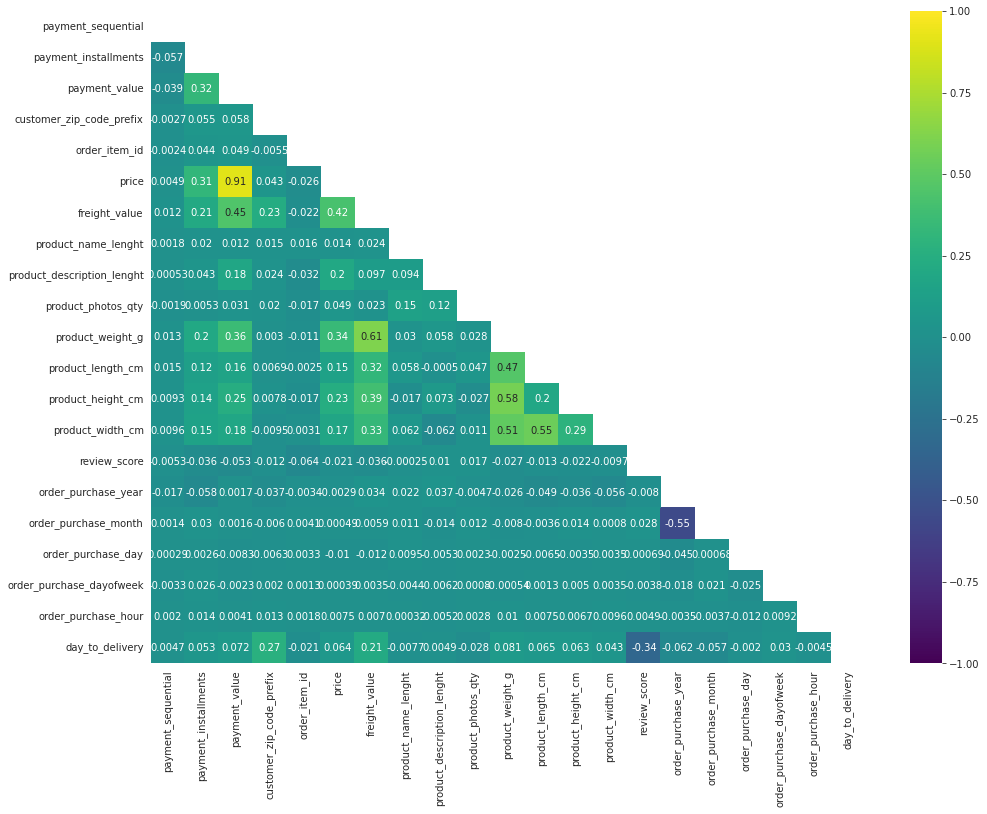

In [188]:
# Calculating correlation among columns and plotting heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, mask=mask, cmap='viridis');

Performing the heatmap, it is possible to observe the following:

* the variable 'price' has a strong positive correlation with the 'payment_value' (0.91), which makes sense as usually you pay the amount agreed in the beginning but the paid value may include taxes or discounts changing it;
* the variable 'product_weight_g' has a great positive correlation with 'freight_value' (0.61), as the freight is calculated based on the size and weight of the product;
* 'freight_value' is also positively correlated to 'product_length_cm' (0.32), 'product_height_cm' (0.39) and 'product_width_cm' (0.33), for the same reason as mentioned above;
* 'price' is positively correlated to 'freight_value' (0.42). The relation for this one is not clear enough for the group, but it can be due to the fact that some products values are calculated over the weight of them;
* 'product_weight_g' is positively correlated to 'product_length_cm' (0.47), 'product_height_cm' (0.58) and 'product_width_cm' (0.51), as the weight is calculated based on the product's dimensions;
* 'review_score' is negatively correlated to 'day_to_delivery' (-0.34), indicating that the less it takes to the product to get to the client, the higher the review.

Other different kinds of plots were drawn to better visualise the correlation among those variables, like the pairplot and the jointplot. The pairplot, applied to all the variables that have good correlation according to heatmap above, makes it possible to visualise the correlations by using scatterplots. In the diagonals, there is a kde plot showing the distribution.


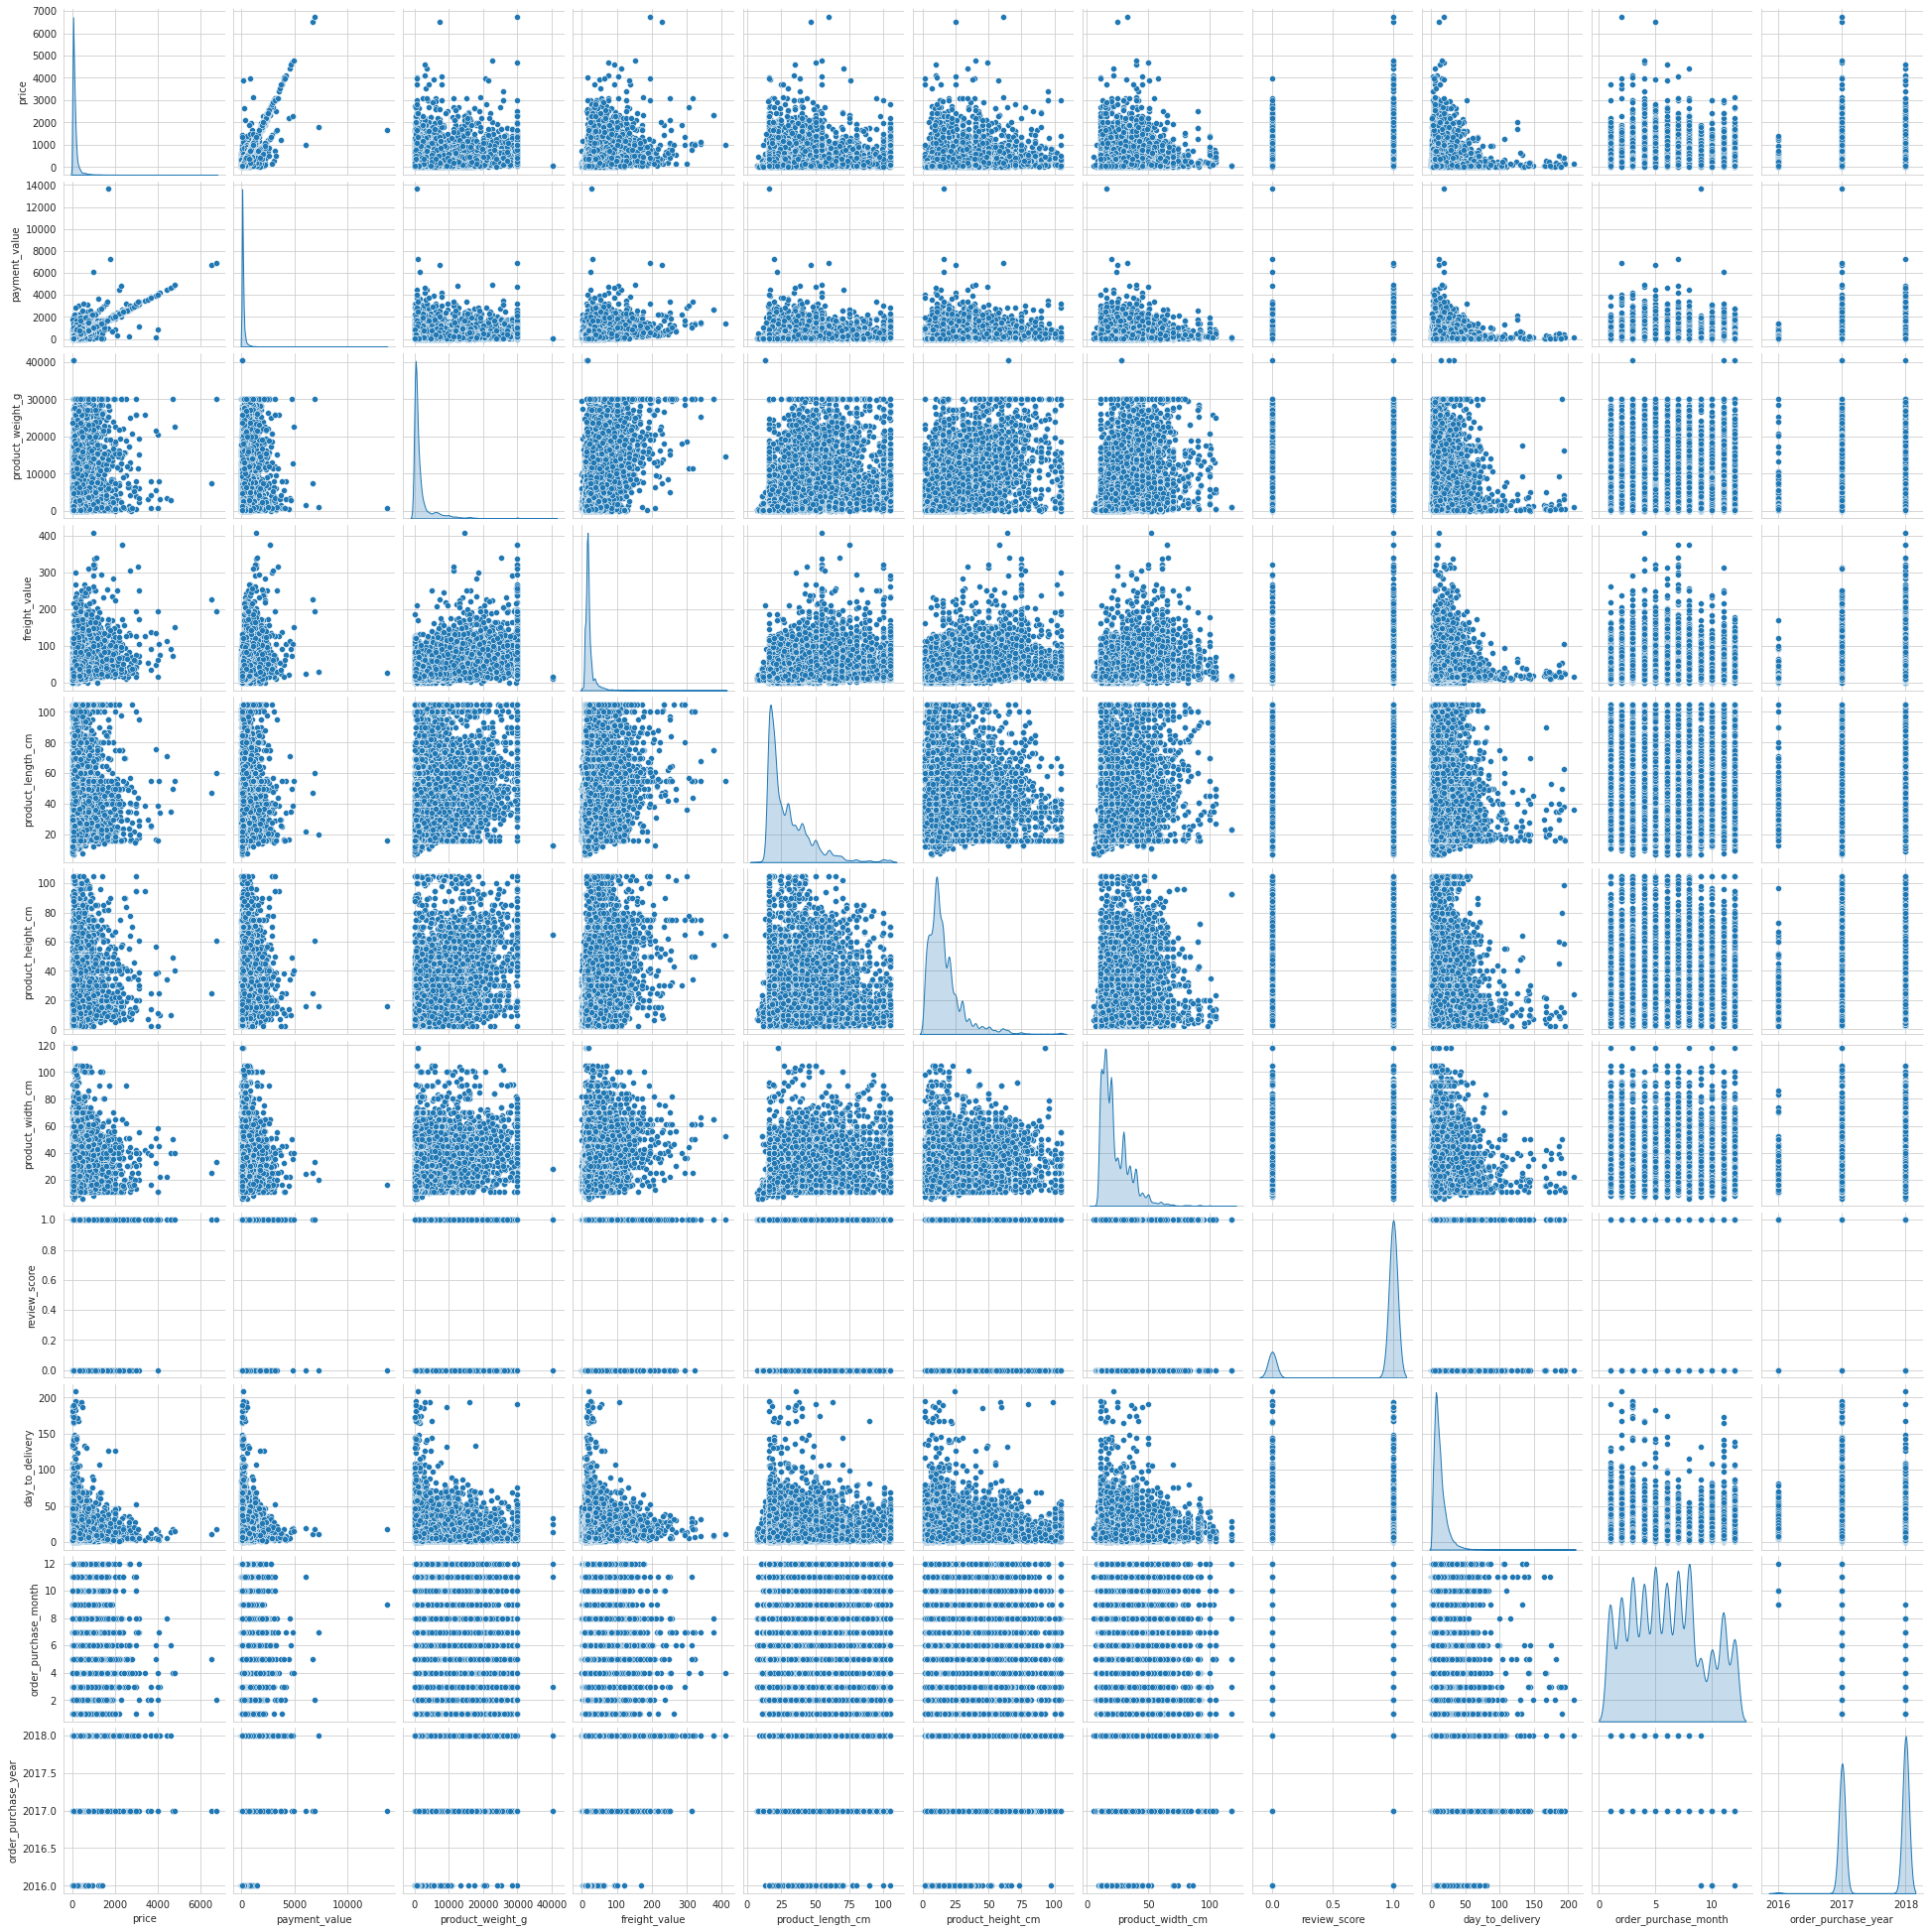

In [189]:
# Plotting a pairplot to get a general visualisation of the correlation

columns = ['price', 'payment_value', 'product_weight_g', 'freight_value', 'product_length_cm', 'product_height_cm',
          'product_width_cm', 'review_score', 'day_to_delivery', 'order_purchase_month', 'order_purchase_year']


sns.pairplot(df[columns], diag_kind='kde');

It can be observed on the plot above that none of the variables follow a normal distribution, as they are mostly right-skewed (positively skewed). Also, it is possible to see some correlated variables that were highlighted by the heatmap, such as 'price' and 'payment_value'. The correlation between those two variables will be analysed on the jointplot later on. For the other variables, it is possible to see that the points are clustering together in some regions of the plots, confirming the existence of correlation.

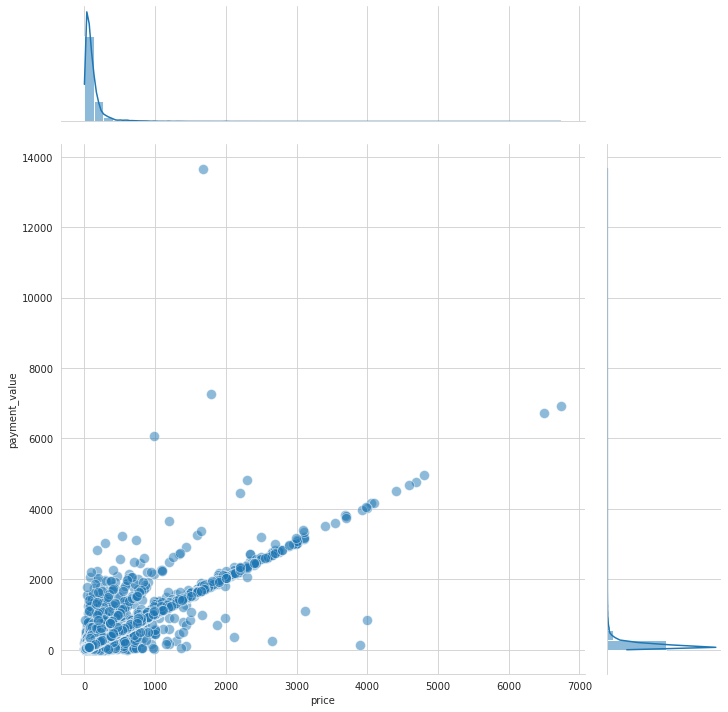

In [190]:
# Taking the two varibles that will be part of the basket analysis (corr = 0.91)
g = sns.JointGrid(data=df, x='price', y='payment_value', height=10, ratio=4)
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True, bins=50);

Analysing the variables 'price' and 'payment_value' closer, it is possible to see that there are some datapoints clustered in between the points (0, 2000) and (1000, 0), but there are some points forming a line, meaning that the correlation between them follow a linear model. The best thing about the joint plot is that it is possible to plot the correlation between two variables in the main grid and individual distribution plots on the marginals. In this case, both variables clearly have right-skewed distribution with most of the values concentrating close to 0. A good way to clarify the plot is changing the limits of the axis.

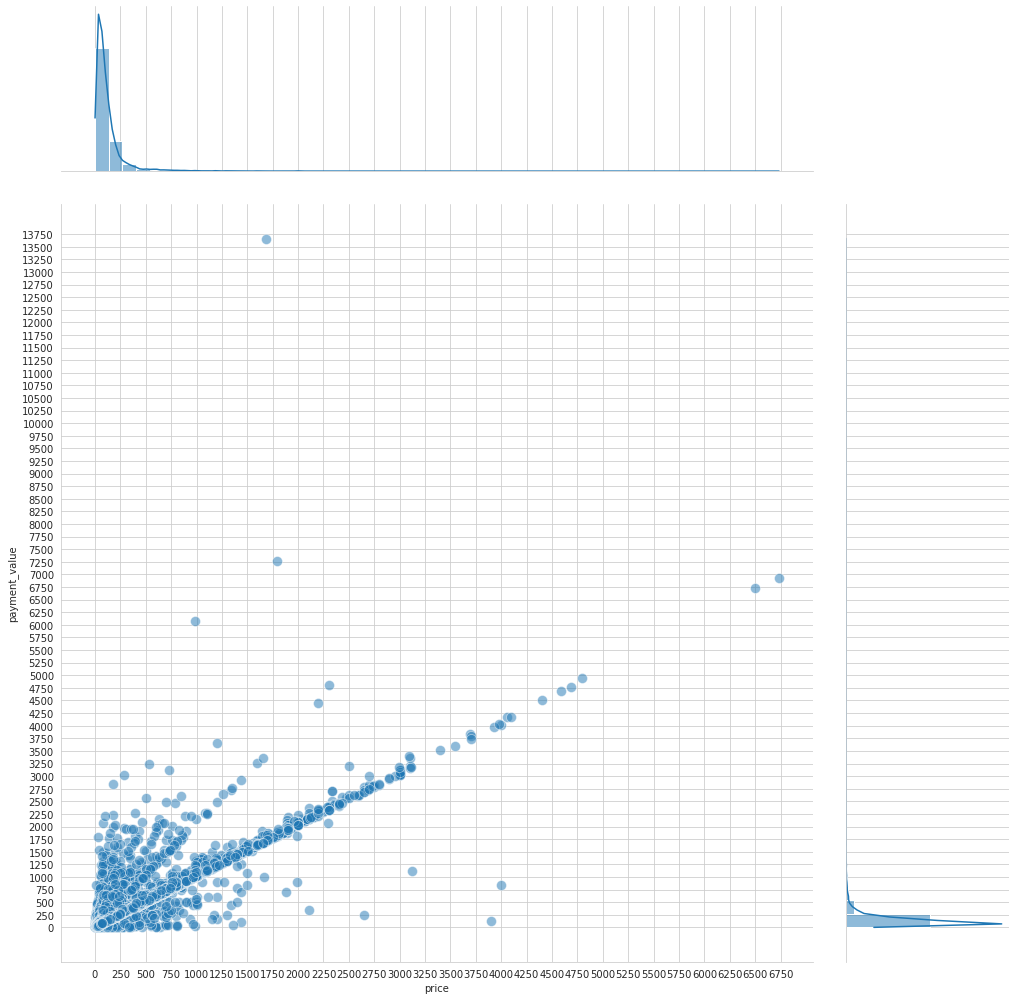

In [191]:
# Changing the axis for better visualisation
g = sns.JointGrid(data=df, x='price', y='payment_value', height=14, ratio=4)
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True, bins=50)
g.ax_joint.set_xticks(range(0, 7000, 250))
g.ax_joint.set_yticks(range(0, 14000, 250));

Changing the axis ticks provided a better understanding of how the variables are related. The majority of the price datapoints are between 0 and 250 and the majority of payment_values datapoints are between 0 and 250, which confirms that both values are quite similar and that is why they have a great correlation.

## Market Basket Analysis

The Market Basket Analysis (MBA) is a technique applied to datasets to look for relation between items, which means that it works by looking for combinations of items that occur together frequently in transactions (Li, 2017). These relationships can be used to increase profitability through cross-selling, recommendations, promotions, or even the placement of items on a menu or in a store.

A Market Basket Analysis was done using the dataset chosen for question number 4 (df_4). Before starting the analysis, a variable 'basket' was created to store the dataset sorted by 'order_id'. The set of items chosen to be checked for combinations is the column 'product_category_name_english'.


In [192]:
# Creating the basket

basket = df_4.groupby('order_id').product_category_name_english.unique()
basket.head()

order_id
00010242fe8c5a6d1ba2dd792cb16214         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3           [pet_shop]
000229ec398224ef6ca0657da4fc703e    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75          [perfumery]
00042b26cf59d7ce69dfabb4e55b4fd9       [garden_tools]
Name: product_category_name_english, dtype: object

A barplot was performed to show the 20 more common categories of itens were bought for the clients.

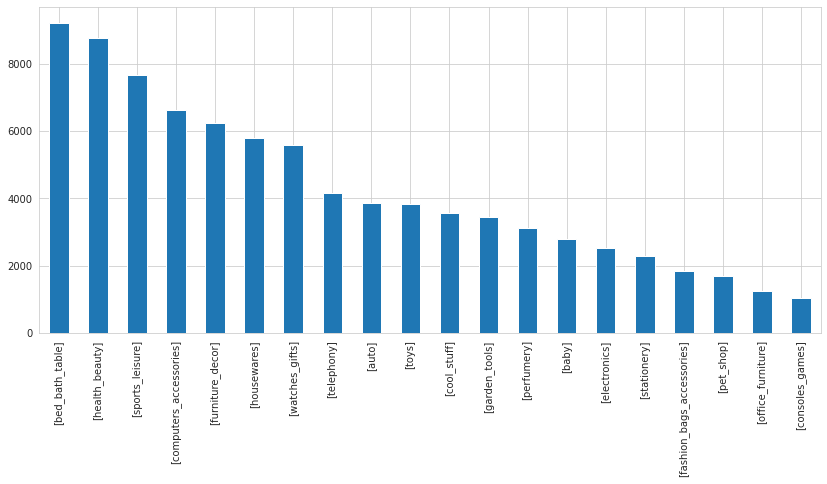

In [193]:
# Displaying the 20 most common categories of products
basket.value_counts()[:20].plot(kind='bar', figsize=(14,6));

The algorithms used were the Apriori Algorithm and the FP-Growth Algorithm. Apriori is a tree-based algorithm that requires multiple database scans to generate a candidate set, while FP-Growth is an array-based algorithm that requires only two scans to generate the candidate set, making it faster than Apriori.

### MBA Preprocessing

Before applying the algorithms, the selected basket was converted to a list and a Transaction Encoder was applied. A dataframe of the transactions was created.

In [194]:
# Applying the Transaction Encoder
basket = basket.to_list()

# Create an object te by calling a method TransactionEncoder()
te = TransactionEncoder()

# Call fit() method to train the model
te_array = te.fit(basket).transform(basket)

# Transform te_array into dataframe
df_basket = pd.DataFrame(te_array, columns = te.columns_)

In [195]:
df_basket.head()

agro_industry_and_commerce  air_conditioning  ...   toys  watches_gifts
0                       False             False  ...  False          False
1                       False             False  ...  False          False
2                       False             False  ...  False          False
3                       False             False  ...  False          False
4                       False             False  ...  False          False

[5 rows x 71 columns]

### Apriori Method

The Apriori method was applied to get the frequent items, using a minimum support of 0.01%, meaning that the probability that a given item set appears in the data is 0.01%.

In [196]:
# Calculate the sfrequenct itemsets by calling a method apriori
frequent_itemsets_ap = apriori(df_basket, min_support = 0.0001, use_colnames = True)

In [197]:
# Printing the frequent itens list
print(frequent_itemsets_ap)

     support                         itemsets
0   0.001871     (agro_industry_and_commerce)
1   0.002601               (air_conditioning)
2   0.002077                            (art)
3   0.000236          (arts_and_craftmanship)
4   0.003599                          (audio)
..       ...                              ...
81  0.000247    (furniture_decor, housewares)
82  0.000113       (housewares, garden_tools)
83  0.000123       (health_beauty, perfumery)
84  0.000144  (sports_leisure, health_beauty)
85  0.000113     (sports_leisure, housewares)

[86 rows x 2 columns]


After getting the frequent itemsets, the algorithm for association rules was applied using support as a metric. Minimum Threshold established is the same as used for the apriori algorithm (0.01%).

In [198]:
# Display the rules due to apriori algorithm
rules_ap = association_rules(frequent_itemsets_ap, metric = 'support', min_threshold = 0.0001)
rules_ap

antecedents  ... conviction
0              (bed_bath_table)  ...   0.972091
1                        (baby)  ...   0.908527
2                  (cool_stuff)  ...   0.975709
3                        (baby)  ...   0.969375
4             (furniture_decor)  ...   0.972145
5                        (baby)  ...   0.937590
6                        (toys)  ...   0.975104
7                        (baby)  ...   0.966408
8              (bed_bath_table)  ...   0.963679
9                  (cool_stuff)  ...   0.905667
10            (furniture_decor)  ...   0.913084
11             (bed_bath_table)  ...   0.940683
12             (bed_bath_table)  ...   0.910210
13              (health_beauty)  ...   0.904299
14             (bed_bath_table)  ...   1.000486
15               (home_confort)  ...   1.012881
16             (bed_bath_table)  ...   0.941499
17                 (housewares)  ...   0.906253
18            (furniture_decor)  ...   0.999195
19  (construction_tools_lights)  ...   0.977770
20            (furniture_decor)  ...   0.966375
21               (garden_tools)  ...   0.938224
22            (furniture_decor)  ...   0.996971
23          (home_construction)  ...   0.959137
24            (furniture_decor)  ...   0.943009
25                 (housewares)  ...   0.937514
26                 (housewares)  ...   0.965633
27               (garden_tools)  ...   0.942447
28              (health_beauty)  ...   0.968804
29                  (perfumery)  ...   0.912610
30             (sports_leisure)  ...   0.910799
31              (health_beauty)  ...   0.922083
32             (sports_leisure)  ...   0.940840
33                 (housewares)  ...   0.922346

[34 rows x 9 columns]

### FP-Growth

Similar to the Apriori, FP-Growth method was applied to get the frequent items, using also a minimum support of 0.01%.

In [199]:
# Calculate the sfrequenct itemsets by calling a method apriori
frequent_itemsets_fp = fpgrowth(df_basket, min_support = 0.0001, use_colnames = True)

In [200]:
# Printing the frequent itens list
print(frequent_itemsets_fp)

     support                                      itemsets
0   0.037345                                  (cool_stuff)
1   0.017582                                    (pet_shop)
2   0.066310                             (furniture_decor)
3   0.032512                                   (perfumery)
4   0.036173                                (garden_tools)
..       ...                                           ...
81  0.000175                        (bed_bath_table, baby)
82  0.000123                       (furniture_decor, baby)
83  0.000113  (furniture_decor, construction_tools_lights)
84  0.000442                (bed_bath_table, home_confort)
85  0.000134          (furniture_decor, home_construction)

[86 rows x 2 columns]


After getting the frequent itemsets, the algorithm for association rules was applied using support as a metric. Minimum Threshold established is the same as used for the apriori algorithm (0.01%).

In [201]:
# Display the reles due to apriori algorithm
rules_fp = association_rules(frequent_itemsets_fp, metric = 'support', min_threshold = 0.0001)

rules_fp

antecedents  ... conviction
0              (bed_bath_table)  ...   0.963679
1                  (cool_stuff)  ...   0.905667
2              (bed_bath_table)  ...   0.940683
3             (furniture_decor)  ...   0.913084
4               (health_beauty)  ...   0.968804
5                   (perfumery)  ...   0.912610
6                  (housewares)  ...   0.965633
7                (garden_tools)  ...   0.942447
8             (furniture_decor)  ...   0.966375
9                (garden_tools)  ...   0.938224
10             (bed_bath_table)  ...   0.941499
11                 (housewares)  ...   0.906253
12             (sports_leisure)  ...   0.940840
13                 (housewares)  ...   0.922346
14            (furniture_decor)  ...   0.943009
15                 (housewares)  ...   0.937514
16             (bed_bath_table)  ...   0.910210
17              (health_beauty)  ...   0.904299
18             (sports_leisure)  ...   0.910799
19              (health_beauty)  ...   0.922083
20                       (toys)  ...   0.975104
21                       (baby)  ...   0.966408
22                 (cool_stuff)  ...   0.975709
23                       (baby)  ...   0.969375
24             (bed_bath_table)  ...   0.972091
25                       (baby)  ...   0.908527
26            (furniture_decor)  ...   0.972145
27                       (baby)  ...   0.937590
28            (furniture_decor)  ...   0.999195
29  (construction_tools_lights)  ...   0.977770
30             (bed_bath_table)  ...   1.000486
31               (home_confort)  ...   1.012881
32            (furniture_decor)  ...   0.996971
33          (home_construction)  ...   0.959137

[34 rows x 9 columns]

The association rules for both Apriori and FP-Growth were print and the following conclusions were drawn:

* The confidence of the rules was very low, the highest being that of the rule {home_comfort} --> {bed_bath_table} (10.83%);
* For all rules the lift is different from 1, which indicates that there is a dependency relationship between the items;
* Of all the combinations, the only one that represents a positive relationship is {home_comfort} --> {bed_bath_table}, with lift greater than 1 (1.1186). This indicates that when home_comfort is purchased, 11.86% of the time so is bed_bath_table;
* For the rest of the rules the lift value is less than 1, indicating that the second item is unlikely to be acquired with the first.

It was requested to apply unsupervised learning in this part of the analysis, which it was done as the Association Rule method is unsupervised learning itself. As the dataset used for this analysis did not have any target variable, the train test split was not performed.

In regards to the visualisation, the correlation plots did not have much to add to the Market Basket Analysis, as they do not relate with the analysis at all. As the algorithm uses frequency of items in transactions, the only variable used for this analysis was the category of products.

# References

-Athanasopoulos, G. & Hyndman, R. J., 2018. Forecasting: Principles and Practice. 2nd edition ed. Melbourne: OTexts.
 
-Cascione, S., 2017. Brazil's worst-ever recession unexpectedly deepens in late 2016. [Online] Available at: https://www.reuters.com/article/us-brazil-economy-gdp-idUSKBN16E1EL [Accessed november 2021].
 
-Clark, A., 2018. How helpful are product recommendations, really?. [Online] Available at: https://news.ufl.edu/articles/2018/09/how-helpful-are-product-recommendations-really.html#:~:text=Every%20major%20e%2Dcommerce%20site,what%20we%20stream%20on%20Netflix [Accessed november 2021].
 
-Dobilas, S., 2021. Apriori Algorithm for Association Rule Learning — How To Find Clear Links Between Transactions. [Online]  Available at: https://towardsdatascience.com/apriori-algorithm-for-association-rule-learning-how-to-find-clear-links-between-transactions-bf7ebc22cf0a [Accessed november 2021].
 
-Fuchs, M., 2020. Time Series Analysis - Smoothing Methods. [Online]  Available at: https://michael-fuchs-python.netlify.app/2020/10/23/time-series-analysis-smoothing-methods/ [Accessed november 2021].
 
-Glen, S., 2018. Exponential Smoothing: Definition of Simple, Double and Triple. [Online] Available at: https://www.statisticshowto.com/exponential-smoothing/ [Accessed november 2021].
 
-Hahsler, M. & Hornik, K., 2007. New probabilistic interest measures for association rules. Intelligent Data Analysis, 1 october, Volume 11.
 
-Iqbal, M. (2021) 'Introduction to Clustering' [Lecture], Machine Learning for Business HDIP in Sci in Data Analytics for Business. CCT College. 16 August 2021.
 
-Iqbal, M. (2021) ‘ARIMA and SARIMA Time Series Models' [Lecture], Machine Learning for Business HDIP in Sci in Data Analytics for Business. CCT College. 20 September 2021.
 
-Iqbal, M. (2021) ‘Exponential Smoothing Models' [Lecture], Machine Learning for Business HDIP in Sci in Data Analytics for Business. CCT College. 04 October 2021.
 
-Iqbal, M. (2021) ‘Graph Analytics and Recommender System' [Lecture], Machine Learning for Business HDIP in Sci in Data Analytics for Business. CCT College. 25 October 2021.
 
-Iqbal, M. (2021) ‘Association Rules (Market Basket Analysis)' [Lecture], Machine Learning for Business HDIP in Sci in Data Analytics for Business. CCT College. 01 November 2021.
 
-Kadlaskar, A., 2021. A Comprehensive Guide on Market Basket Analysis. [Online]  Available at: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/ [Accessed november 2021].
 
-Li, S., 2017. A Gentle Introduction on Market Basket Analysis — Association Rules. [Online] Available at: https://towardsdatascience.com/a-gentle-introduction-on-market-basket-analysis-association-rules-fa4b986a40ce [Accessed november 2021].
 
-Mbaabu, O., 2020. Clustering in Unsupervised Machine Learning. [Online]  Available at: https://www.section.io/engineering-education/clustering-in-unsupervised-ml/ [Accessed november 2021].
 
-Plotly, 2021. Plotly F# Open Source Graphing Library Statistical Charts. [Online]  Available at: https://plotly.com/fsharp/statistical-charts/ [Accessed november 2021].
 
-Prakash, P. & Pal, A., 2017. Practical Time Series Analysis. s.l.:Packt Publishing.
 
-Rao, N. H. & Jalil, A., 2019. Time Series Analysis (Stationarity, Cointegration, and Causality). In: B. Özcan & I. Öztürk, eds. Environmental Kuznets Curve (EKC): A Manual. s.l.:Elsevier Inc., pp. 85-99.
 
-Vandeput, N., 2019. Simple Exponential Smoothing for Time Series Forecasting. [Online] Available at: https://towardsdatascience.com/simple-exponential-smoothing-749fc5631bed [Accessed november 2021].
